<a href="https://colab.research.google.com/github/Lycoriolis/SIAM2007_Data/blob/main/Cassiopee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

#path to training data
path_train_csv = "/content/TrainCategoryMatrix.txt"
path_train_txt = "/content/TrainingData.txt"


In [ ]:
def trans_train_data(path_to_text, path_to_labels) :
    Xtrain = {}
    Ytrain = {}
    #read the txt file
    with open(path_train_txt, mode='r', encoding='utf-8') as fichier:
        for i, ligne in enumerate(fichier):
            cle, ligne = ligne.split("~", 1)
            ligne = ligne.strip().lower()
            ligne = ligne.replace("_", "[Missing Value]")
            Xtrain[i+1] = ligne.strip()   #sauvegarde le text comme valeur de numero du doc

    # Ouvrir le fichier en mode lecture
    with open(path_train_csv, "r") as fichier:
        # Lire toutes les lignes
        lignes = fichier.readlines()

    # Transformer chaque ligne en une liste d'éléments
    matrice = [ligne.strip().split(",") for ligne in lignes]

    # Parcourir les éléments de la matrice
    for i in range(len(matrice)):
        for j in range(len(matrice[0])):
            if i+1 not in Ytrain :
                Ytrain[i+1] = []
            if matrice[i][j] == '1' :
                Ytrain[i+1].append(j)    #ajouter les classes a chaque doc

    return Xtrain, Ytrain

Xtrain, Ytrain = trans_train_data(path_to_text=path_train_txt, path_to_labels=path_train_csv)


Xtrain = {numero doc : 'text',....}
Ytrain = {numero doc : [classe1, classe4], ....}

In [ ]:
Xtrain[1]


'locate [Missing Value] distancemeasuringequipment from runway on the locate frequency [Missing Value].clear for the instrumentlandingsystemrunway to dfw airport maintain [Missing Value] feet till establish we were on the locate track inbound and start to descend to [Missing Value] feet after pass galop which is [Missing Value] distancemeasuringequipment.after look at the approach chart more careful i notice that we weren t suppose to descend until frizz which is [Missing Value] distancemeasuringequipment.i immediate inform the captain and he correct back to [Missing Value] feet and maintain that until reach frizz.we had descend about [Missing Value] feet before return to [Missing Value] feet.'

# `Data Analysis`

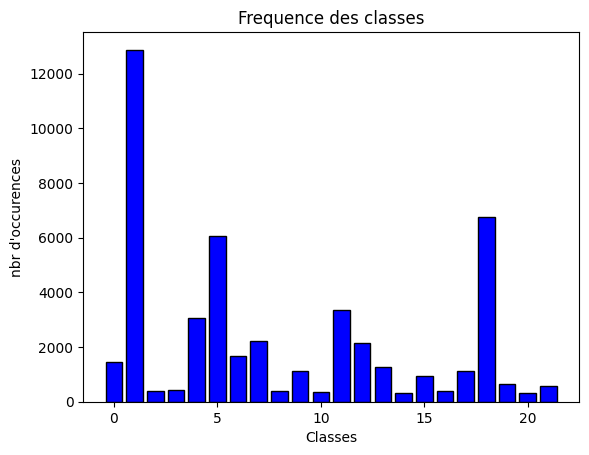

In [ ]:
# Initialiser un dictionnaire de classes
classes = {}
# Ouvrir le fichier en mode lecture
with open(path_train_csv, "r") as matrix:
        # Lire toutes les lignes
    lignes = matrix.readlines()

# Transformer chaque ligne en une liste d'éléments
matrice = [ligne.strip().split(",") for ligne in lignes]

# Parcourir les éléments de la matrice
for i in range(len(Ytrain)):
    for j in range(len(matrice[0])):
        if j not in classes:
            classes[j] = []
        if matrice[i][j] == '1' :
            classes[j].append(i+1)   #ajouter le numero des docs a sa classe

#Creer une liste qui compte l'occurence d'une classe
occurences = [] #Liste des occurences de chaque classe
for i in classes :
    occurences.append(len(classes[i]))

#Afficher une courbe qui affiche combien de fois une classe a apparu
plt.bar(classes.keys(), occurences, color = 'blue', edgecolor='black')

plt.title('Frequence des classes')
plt.xlabel('Classes')
plt.ylabel("nbr d'occurences")

plt.show()

In [ ]:
#Moyenne de frequence de classes
sum(occurences)/len(occurences)

2176.909090909091

Pour chaque classe quelle est l'occurence de chaque mot ?
Peut on voir les mots qui peuvent representer une classe ?


In [ ]:
import re
from collections import Counter

Occ_mots_text_ds_class = {}

for i in classes :
    Occ_mots_text_ds_class[i] = []
    for num_doc in classes[i] :
        texte = Xtrain[num_doc]

        # Nettoyage du texte
        # Mettre en minuscules et retirer les caractères spéciaux (ponctuation)
        texte_nettoye = re.sub(r'[^\w\s]', '', texte)  # Suppression de la ponctuation

        # Tokenisation : découper le texte en mots
        mots = texte_nettoye.split()

        # Compter les occurrences des mots distincts
        compteur = Counter(mots)

        # Stocker le compteur des mots distincts dans le dictionnaire
        Occ_mots_text_ds_class[i] = compteur

for i in Occ_mots_text_ds_class :
    if i>=1 :
        break
    compteur = Occ_mots_text_ds_class[i]
    mots_tries = compteur.most_common()
    # Afficher les mots les plus fréquents
    print("Mots les plus fréquents:")
    for mot, frequence in mots_tries:
        print(f"pour la classe {i} : - {mot}: {frequence}")


Mots les plus fréquents:
pour la classe 0 : - a: 6
pour la classe 0 : - the: 6
pour la classe 0 : - and: 5
pour la classe 0 : - student: 4
pour la classe 0 : - to: 4
pour la classe 0 : - my: 3
pour la classe 0 : - i: 3
pour la classe 0 : - by: 3
pour la classe 0 : - in: 3
pour la classe 0 : - after: 2
pour la classe 0 : - routine: 2
pour la classe 0 : - our: 2
pour la classe 0 : - federalaviationadministrationinspector: 2
pour la classe 0 : - item: 2
pour la classe 0 : - overlook: 2
pour la classe 0 : - thing: 2
pour la classe 0 : - may: 2
pour la classe 0 : - trainingflight: 1
pour la classe 0 : - were: 1
pour la classe 0 : - meteorology: 1
pour la classe 0 : - exit: 1
pour la classe 0 : - c150l: 1
pour la classe 0 : - an: 1
pour la classe 0 : - who: 1
pour la classe 0 : - ask: 1
pour la classe 0 : - do: 1
pour la classe 0 : - rampinspectionafter: 1
pour la classe 0 : - inspect: 1
pour la classe 0 : - explain: 1
pour la classe 0 : - us: 1
pour la classe 0 : - he: 1
pour la classe 0 : 

Quelles sont les longueurs du texte ? Combien de mots y a t il dans chaque doc ? Quelles son max, min et la moyenne ?


Moyenne: 1287.5454714438404
Maximum: 5349
Minimum: 5


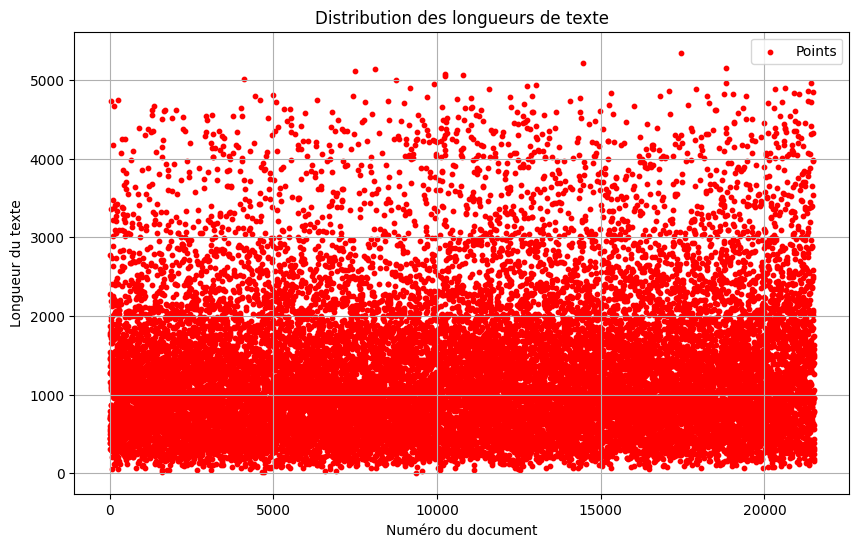

In [ ]:
def calcul_nombre_mots(dic):
    """
    Calcule les statistiques des longueurs de texte et affiche un nuage de points.

    Args:
        dic (dict): Un dictionnaire où les valeurs sont des textes.
    """
    # 1. Calculer la longueur de chaque texte
    longueurs = [len(text) for text in dic.values()]

    # 2. Calculer les statistiques
    moyenne = np.mean(longueurs)
    maximum = np.max(longueurs)
    minimum = np.min(longueurs)

    print(f"Moyenne: {moyenne}")
    print(f"Maximum: {maximum}")
    print(f"Minimum: {minimum}")

    # 3. Tracer un nuage de points des longueurs
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(longueurs)), longueurs, color='r', label="Points", s=10)
    plt.title("Distribution des longueurs de texte")
    plt.xlabel("Numéro du document")
    plt.ylabel("Longueur du texte")
    plt.legend()
    plt.grid(True)  # Ajouter une grille pour une meilleure lisibilité
    plt.show()


calcul_nombre_mots(Xtrain)


Quelle est le nombre de classes pour chaque doc ?


{1: 5949, 2: 7867, 3: 5541, 4: 1522, 5: 443, 6: 122, 7: 56, 8: 13, 9: 5, 10: 1}


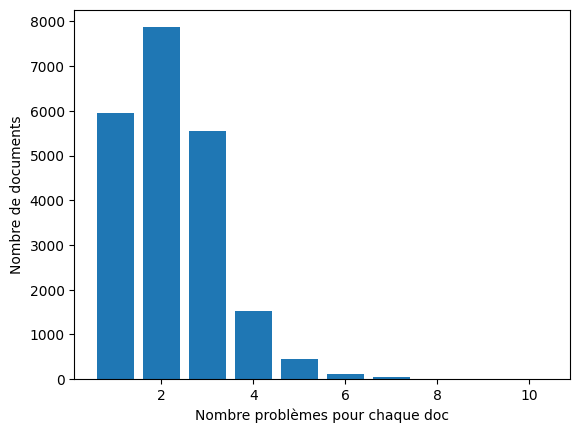

In [ ]:
# Liste pour stocker le nombre de classes par document
nb_class_par_doc = []

# Calcul du nombre de classes pour chaque document
for i in Ytrain:
    x = len(Ytrain[i])  # Nombre de classes pour chaque document
    nb_class_par_doc.append(x)

# Trier la liste
nb_class_par_doc.sort()

# Dictionnaire pour stocker les fréquences de chaque nombre de classes
liste = {}
count = 0

# Compter les occurrences de chaque nombre de classes
for i in range(len(nb_class_par_doc) - 1):
    if nb_class_par_doc[i] == nb_class_par_doc[i + 1]:
        count += 1
    else:
        liste[nb_class_par_doc[i]] = count + 1
        count = 0

# Ajouter le dernier élément
liste[nb_class_par_doc[-1]] = count + 1
print(liste)

# Affichage du graphique à barres
plt.bar(liste.keys(), liste.values())

plt.xlabel("Nombre problèmes pour chaque doc")
plt.ylabel("Nombre de documents")

plt.show()



# Data preparation

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
# Spécifie un répertoire pour télécharger les ressources nltk

# Téléchargement des ressources nécessaires
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

def clean_text(text):

    # 1. Supprimer les balises et valeurs inutiles comme [Missing Value] (non significatif)
    text = re.sub(r'\[Missing Value\]', '', text)


    # 2. Supprimer les caractères spéciaux, ponctuation et chiffres
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Tokenisation : Diviser le texte en mots individuels (tokens)
    tokens = word_tokenize(text)

    # 4. Supprimer les mots vides (stopwords) : Les mots comme "the", "and" n'ont pas d'importance pour l'analyse
    stop_words = set(stopwords.words('english'))  # Liste de mots vides en anglais
    tokens = [word for word in tokens if word not in stop_words]


    # 5. Lemmatisation : Réduire les mots à leur forme de base (par exemple "running" devient "run")
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]


    # 6. Rejoindre les tokens pour reformer un texte nettoyé
    cleaned_text = ' '.join(tokens)

    return cleaned_text


# Exemple de texte à nettoyer
texte = Xtrain[7]
# Nettoyage du texte
texte_nettoye = clean_text(texte)
print(texte_nettoye)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


land runway taxi across airport underground control restrict hold short runway approach runway clear crossrunway baron mile finalwe observe beech runway hold takeoffthe never begin move cross runway abort hi takeoff groundcontrol complain ground runwayincursionground reiterate clear crossit unusual clear crossrunway aircraft posit holdas usual situate pilot keep eye hold aircraft clear


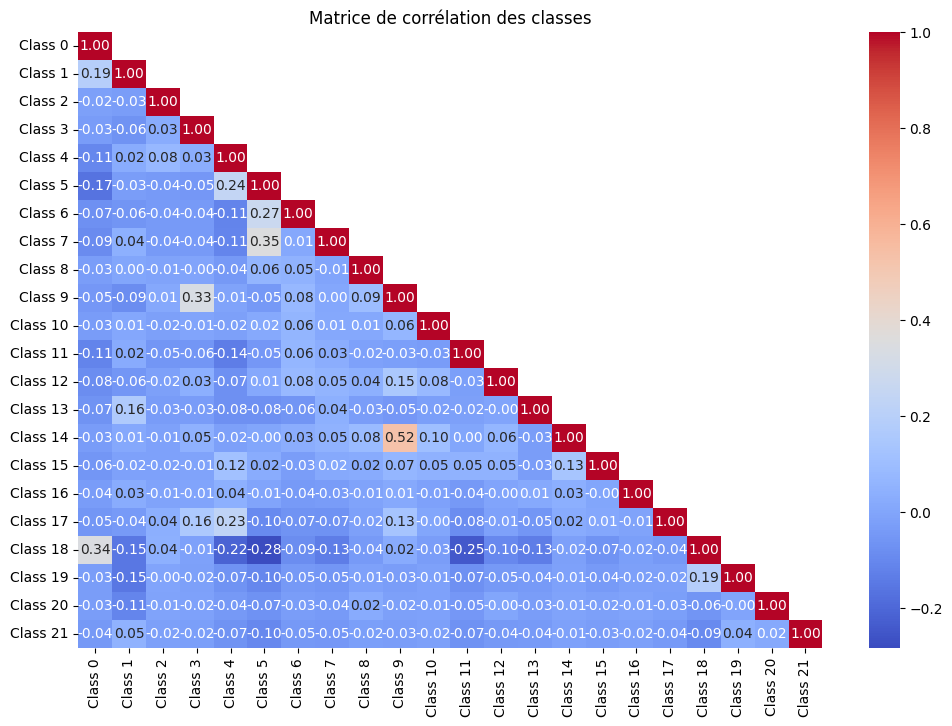

In [ ]:

# %%
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def build_binary_matrix(Ytrain, num_classes):
    num_docs = len(Ytrain)
    binary_matrix = np.zeros((num_docs, num_classes), dtype=int)
    for doc_id, classes in Ytrain.items():
        for cls in classes:
            binary_matrix[doc_id - 1, cls] = 1
    return binary_matrix

def calculate_correlation(binary_matrix):
    df = pd.DataFrame(binary_matrix)
    correlation_matrix = df.corr(method='pearson')  # Ou utilisez 'spearman', 'kendall', selon vos besoins
    return correlation_matrix

def plot_correlation_heatmap(correlation_matrix, class_labels):
    mask = np.zeros_like(correlation_matrix)
    mask[np.triu_indices_from(mask,1)] = True
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Matrice de corrélation des classes')
    plt.show()


# Exemple d'utilisation
num_classes = 22  # Remplacez par le nombre réel de classes
binary_matrix = build_binary_matrix(Ytrain, num_classes)
correlation_matrix = calculate_correlation(binary_matrix)

# Optionnel : Ajouter des étiquettes pour les classes
class_labels = [f"Class {i}" for i in range(num_classes)]
plot_correlation_heatmap(correlation_matrix, class_labels)



Moyenne: 821.8102606998466
Maximum: 3607
Minimum: 4


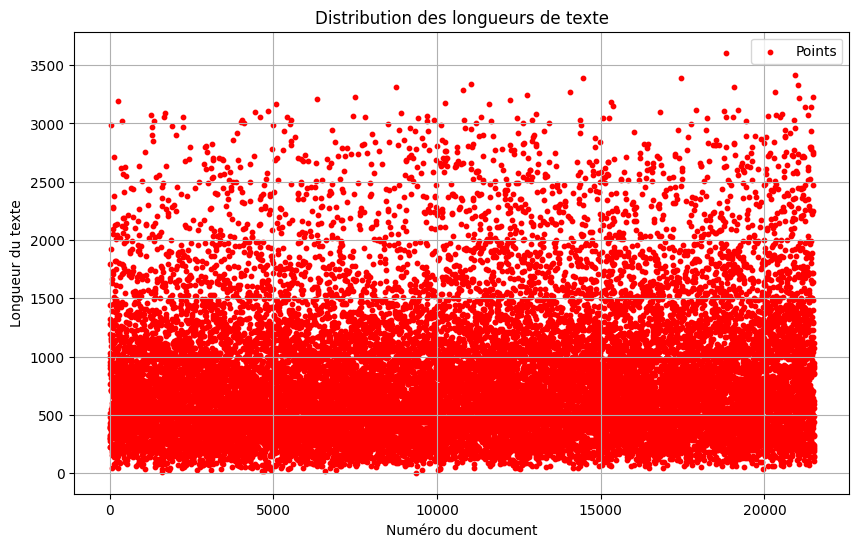

In [ ]:
cleaned_texts = {}

for i in Xtrain.keys():
    text = Xtrain[i]
    cleaned_texts[i] = clean_text(text)
calcul_nombre_mots(cleaned_texts)


In [ ]:
## Transformer les classes en binaire
def trans_label_binaire(y_train) :
    D = {}
    for i in y_train :
        D[i] = [0 for i in range(22)]
        for label in y_train[i] :
            D[i][label] = 1

    return D


In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:

print(tokenizer.tokenize("distancemeasuringequipment"))
tokenizer.vocab_size


['distance', '##me', '##as', '##uring', '##e', '##qui', '##pment']


30522

# BERT EMBEDDINGS

inspired by :
https://github.com/arushiprakash/MachineLearning/tree/main

In [ ]:
def bert_text_preparation(text, tokenizer):
    """Preparing the input for BERT

    Takes a string argument and performs
    pre-processing like adding special tokens,
    tokenization, tokens to ids, and tokens to
    segment ids. All tokens are mapped to seg-
    ment id = 1.

    Args:
        text (str): Text to be converted
        tokenizer (obj): Tokenizer object
            to convert text into BERT-re-
            adable tokens and ids

    Returns:
        list: List of BERT-readable tokens
        obj: Torch tensor with token ids
        obj: Torch tensor segment ids


    """
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1]*len(indexed_tokens)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    return tokenized_text, tokens_tensor, segments_tensors


In [ ]:
def get_bert_sentence_embedding(tokens_tensor, segments_tensors, model, max_length=512):
    device = tokens_tensor.device  # Ensure all tensors are on the same device

    all_token_embeddings = []

    # Ensure tensors have correct shape
    if tokens_tensor.dim() == 1:
        tokens_tensor = tokens_tensor.unsqueeze(0)
    if segments_tensors.dim() == 1:
        segments_tensors = segments_tensors.unsqueeze(0)

    if tokens_tensor.size(1) > max_length:
        num_chunks = (tokens_tensor.size(1) + max_length - 1) // max_length

        for i in range(num_chunks):
            start_idx = i * max_length
            end_idx = min((i + 1) * max_length, tokens_tensor.size(1))

            chunk_tokens = tokens_tensor[:, start_idx:end_idx]
            chunk_segments = segments_tensors[:, start_idx:end_idx]

            chunk_tokens = chunk_tokens.to(device)
            chunk_segments = chunk_segments.to(device)

            with torch.no_grad():
                outputs = model(chunk_tokens, token_type_ids=chunk_segments, output_hidden_states=True)
                hidden_states = outputs.hidden_states[-1]
                token_embeddings = hidden_states.squeeze(0)

            all_token_embeddings.append(token_embeddings.mean(dim=0))

        sentence_embedding = torch.mean(torch.stack(all_token_embeddings), dim=0)

    else:
        tokens_tensor = tokens_tensor.to(device)
        segments_tensors = segments_tensors.to(device)

        with torch.no_grad():
            outputs = model(tokens_tensor, token_type_ids=segments_tensors, output_hidden_states=True)
            hidden_states = outputs.hidden_states[-1]
            token_embeddings = hidden_states.squeeze(0)

        sentence_embedding = torch.mean(token_embeddings, dim=0)

    return sentence_embedding.cpu().numpy()  # Move the result back to CPU before converting to numpy

In [ ]:
for i in Xtrain.keys():
  tokens, tensors, segments = bert_text_preparation(clean_text(Xtrain[i]), tokenizer)
  if len(tokens) > 512 :
    print(i, "tokens : ", len(tokens), ", tensors : ",tensors.shape, ",segments :",segments.shape)
  if i > 1000 :
    break

48 tokens :  659 , tensors :  torch.Size([1, 659]) ,segments : torch.Size([1, 659])
137 tokens :  554 , tensors :  torch.Size([1, 554]) ,segments : torch.Size([1, 554])
250 tokens :  594 , tensors :  torch.Size([1, 594]) ,segments : torch.Size([1, 594])
379 tokens :  656 , tensors :  torch.Size([1, 656]) ,segments : torch.Size([1, 656])
473 tokens :  540 , tensors :  torch.Size([1, 540]) ,segments : torch.Size([1, 540])
503 tokens :  513 , tensors :  torch.Size([1, 513]) ,segments : torch.Size([1, 513])
904 tokens :  540 , tensors :  torch.Size([1, 540]) ,segments : torch.Size([1, 540])
998 tokens :  533 , tensors :  torch.Size([1, 533]) ,segments : torch.Size([1, 533])


In [ ]:
tokens, tensors, segments = bert_text_preparation(clean_text(Xtrain[48]), tokenizer)

embeddings = get_bert_sentence_embedding(tensors, segments, bert_model)
print("columns of embeddings :",len(embeddings),  "tokens :", len(tokens))


columns of embeddings : 768 tokens : 659


In [ ]:
np.shape(embeddings)

(768,)

In [ ]:
tokens, tensors, segments = bert_text_preparation(clean_text(Xtrain[2]), tokenizer)

embeddings = get_bert_sentence_embedding(tensors, segments, bert_model)
print(embeddings)


[-1.58924356e-01 -6.70786202e-02  5.02612114e-01  1.28823400e-01
  4.46913809e-01 -1.72952950e-01  3.53264630e-01  9.59765092e-02
  9.02395397e-02 -1.49622872e-01  3.13412137e-02  1.64929017e-01
  1.10203177e-01  1.23520501e-01 -3.04345667e-01  3.74292910e-01
  1.44635975e-01 -2.54656732e-01  1.45652639e-02  1.42840758e-01
  5.67209661e-01 -5.83736226e-03 -7.62328282e-02 -1.17990591e-01
  4.65904653e-01  4.18343805e-02 -1.45848647e-01 -4.47123498e-01
 -3.73872340e-01  1.72182053e-01 -6.08528666e-02 -1.20193079e-01
  1.56608090e-01  1.52594060e-01 -2.20253736e-01  2.11052090e-01
 -3.17578375e-01  2.45284706e-01 -1.82208329e-01 -3.56253120e-03
 -2.96693057e-01 -3.54430556e-01  1.89377233e-01 -5.05467616e-02
 -7.47639760e-02 -3.23912680e-01 -5.78983687e-02 -2.09072441e-01
  1.02192664e-03  4.52008583e-02 -1.71041355e-01  5.40533811e-02
 -2.25477681e-01  4.48491462e-02  1.73706263e-01  3.55801791e-01
  5.13034649e-02 -4.85237867e-01 -2.11894080e-01 -2.29592919e-01
  3.39979917e-01 -2.08171

In [ ]:

sampled_data = []
# On parcourt le dictionnaire et on sélectionne les 500 premiers indices de chaque classe
for classe, num_docs in classes.items():
   for num_doc in num_docs[:500]:  # On prend les 500 premiers indices,
        if num_doc not in sampled_data:  # Si l'indice n'a pas encore été ajouté
            sampled_data.append(num_doc)

# 'sampled_data' contient désormais 500 indices pour chaque classe
print(len(sampled_data))  # Doit afficher le nombre total d'indices sélectionnés

7354


In [ ]:
import pandas as pd

def create_df(x_dic, y_dic, list_indexes = sampled_data):

  data = []
  for doc_num in sampled_data:
      text = clean_text( x_dic[doc_num])
      labels = y_dic[doc_num]
      data.append([doc_num, text] + list(labels))

  df = pd.DataFrame(data, columns=["doc_num", "clean_text"] + [f"Classe{i}" for i in range(len(labels))])


  return df

df = create_df(Xtrain, trans_label_binaire(Ytrain))
df.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-3009d769bd28>", line 16, in <cell line: 0>
    df = create_df(Xtrain, trans_label_binaire(Ytrain))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-24-3009d769bd28>", line 7, in create_df
    text = clean_text( x_dic[doc_num])
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-11-3d6ee280381a>", line 23, in clean_text
    tokens = word_tokenize(text)
             ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nltk/tokenize/__init__.py", line 143, in word_tokenize
    return [
           ^
  File "/usr/local/lib/python3.11/dist-packages/nltk/tokenize/__init__.py", line 144, in <listcomp>
    token for sent in sentences for token in _treebank_word_tokenizer.tokenize(sent)
                                      

TypeError: object of type 'NoneType' has no len()

In [ ]:
df.shape

In [ ]:
df.iloc[:5, 2:]

In [ ]:
#from sklearn.model_selection import train_test_split
# Split into train and test
#X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:2], df.iloc[:,2:],test_size=0.2)


In [ ]:
#X_train.head()

In [ ]:
#X_train.shape

In [ ]:
#y_train.shape

In [ ]:
#X_test.shape

In [ ]:
#y_test.shape

In [ ]:
#y_train.head()

In [ ]:
import pandas as pd

X_test_embeddings = np.load('/content/X_test_embeddings_ML.npy')
X_train_embeddings = np.load('/content/X_train_embeddings_ML.npy')
y_train = pd.read_csv('/content/dataframe classes training')
y_test = pd.read_csv('/content/dataframe classes test')

In [ ]:
import numpy as np

def prepare_text_data_for_xgboost(X_train, X_test, tokenizer, model=bert_model):
    """
    Cette fonction traite les données textuelles d'entraînement et de test en générant des embeddings de phrases BERT.

    Args:
        X_train (list): Liste des textes d'entraînement.
        X_test (list): Liste des textes de test.
        tokenizer (obj): Objet tokenizer pré-entraîné pour tokeniser le texte.
        model (obj): Modèle BERT pré-entraîné pour générer les embeddings.

    Returns:
        np.array: Données d'entraînement sous forme d'embeddings BERT pour XGBoost.
        np.array: Données de test sous forme d'embeddings BERT pour XGBoost.
    """
    # Génération des embeddings pour les données d'entraînement
    train_embeddings = []
    for i, text in enumerate(X_train['clean_text']):
        tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(text, tokenizer)
        sentence_embedding = get_bert_sentence_embedding(tokens_tensor, segments_tensors, model)
        train_embeddings.append(sentence_embedding)
        print(f"Embedding du texte d'entraînement {i+1} terminé.")

    # Conversion en tableaux NumPy
    X_train_embeddings = np.array(train_embeddings)
    print("Embeddings d'entraînement terminés, forme des données :", np.shape(X_train_embeddings))

    # Génération des embeddings pour les données de test
    test_embeddings = []
    for j, text in enumerate(X_test['clean_text']):
        tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(text, tokenizer)
        sentence_embedding = get_bert_sentence_embedding(tokens_tensor, segments_tensors, model)
        test_embeddings.append(sentence_embedding)
        print(f"Embedding du texte de test {j+1} terminé.")

    # Conversion en tableaux NumPy
    X_test_embeddings = np.array(test_embeddings)
    print("Embeddings de test terminés, forme des données :", np.shape(X_test_embeddings))

    return X_train_embeddings, X_test_embeddings


In [ ]:
#X_train_embeddings, X_test_embeddings = prepare_text_data_for_xgboost(X_train, X_test, tokenizer, bert_model)
print(X_train_embeddings.shape)

In [ ]:
X_train_embeddings

In [ ]:
print(X_test_embeddings.shape, X_train_embeddings.shape)

In [ ]:
#np.save('X_test_embeddings_ML.npy', X_test_embeddings)
#np.save('X_train_embeddings_ML.npy', X_train_embeddings)


In [ ]:
# Sauvegarde dans un fichier .npy
#np.save('X_train_embeddings.npy', X_train_embeddings)
#y_train.to_csv('dataframe classes training', index=False)

In [ ]:
#np.save('X_test_embeddings.npy', X_test_embeddings)
#y_test.to_csv('dataframe classes test', index=False)

In [ ]:

y_train_vect = np.argmax(y_train.values, axis=1)
len(y_train_vect)

# **Define XGBoost**

In [ ]:
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [150, 200, 250],
    'min_child_weight': [2, 3, 4],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.5, 0.8],
    'reg_alpha': [0.01, 0.05, 0.1],
    'reg_lambda': [0.05, 0.1, 0.2]
}


In [ ]:
import joblib
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score, make_scorer

def train_multilabel_xgboost_single_model(X_train, y_train, n_folds=5, n_iter_search=12):
    """
    Entraîne un modèle XGBoost unique pour la classification multi-label avec sortie probabiliste.

    Args:
        X_train (np.array): Matrice des features des textes (embeddings).
        y_train (pd.DataFrame): DataFrame binaire avec les classes (1 = appartient, 0 = n'appartient pas).
        n_folds (int): Nombre de folds pour la validation croisée.
        n_iter_search (int): Nombre d'itérations pour RandomizedSearchCV.

    Returns:
        best_model (XGBClassifier): Modèle XGBoost entraîné et optimisé.
    """
    print("Début de l'entraînement du modèle multi-label XGBoost avec sorties probabilistes...")

    # Définition du F1-score macro
    def multi_label_f1(y_true, y_pred):
        return f1_score(y_true, (y_pred > 0.5).astype(int), average='macro')

    f1_scorer = make_scorer(multi_label_f1, greater_is_better=True)

    # Définition du modèle XGBoost unique avec sortie probabiliste
    xgb_model = XGBClassifier(
        objective="multi:softprob",
        eval_metric="mlogloss",
        tree_method="hist",
        random_state=42,
        use_label_encoder=False
    )

    # Validation croisée avec KFold
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Recherche des meilleurs hyperparamètres avec RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=xgb_param_grid,
        n_iter=n_iter_search,
        cv=kf,
        scoring=f1_scorer,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    # Entraînement du modèle
    random_search.fit(X_train, y_train)

    # Meilleur modèle trouvé
    best_model = random_search.best_estimator_
    print("Meilleurs hyperparamètres trouvés:", random_search.best_params_)

    # Sauvegarde du modèle
    joblib.dump(best_model, "xgb_model_multilabel_prob.joblib")
    print("Modèle sauvegardé sous 'xgb_model_multilabel_prob.joblib'")

    return best_model


In [ ]:
models = train_multilabel_xgboost(X_train_embeddings, y_train)



In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le modèle sauvegardé
best_model = joblib.load("/content/xgb_model_multilabel.joblib")

def evaluate_model(X_test, y_test, model):
    """
    Évalue un modèle multi-label en construisant une matrice de confusion globale
    et en la visualisant sous forme de heatmap.

    Args:
        X_test (np.array): Matrice des features des textes (embeddings) pour le test.
        y_test (pd.DataFrame): DataFrame binaire avec les vraies classes.
        model (MultiOutputClassifier): Le modèle entraîné pour la classification multi-label.

    Returns:
        confusion_matrix_global (np.array): La matrice de confusion globale pour toutes les classes.
    """
    # Prédictions du modèle
    y_pred = model.predict(X_test)

    # Calcul de la matrice de confusion globale
    confusion_matrix_global = np.zeros((y_test.shape[1], y_test.shape[1]), dtype=int)

    for i in range(y_test.shape[1]):
        cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
        confusion_matrix_global[i, i] = cm[1, 1]  # Bonnes prédictions (diagonale)
        for j in range(y_test.shape[1]):
            if i != j:
                # Ajouter les erreurs de prédiction entre les classes
                cm_other = confusion_matrix(y_test.iloc[:, j], y_pred[:, j])
                confusion_matrix_global[i, j] += cm_other[1, 0]  # Erreur entre classes

    # Visualisation avec une heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix_global, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=y_test.columns, yticklabels=y_test.columns)
    plt.title("Matrice de Confusion Globale")
    plt.xlabel("Prédictions")
    plt.ylabel("Classes Réelles")
    plt.show()

    return confusion_matrix_global

# Exemple d'utilisation avec X_test et y_test
# Remplacez X_test et y_test par vos propres données de test
confusion_matrix_global = evaluate_model(X_test_embeddings, y_test, best_model)


In [ ]:
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

def plot_multilabel_confusion_matrix(model_path, X_test, y_test, class_names):
    """
    Charge un modèle, effectue des prédictions et affiche une matrice de confusion multilabel.

    Args:
        model_path (str): Chemin du modèle sauvegardé avec joblib.
        X_test (np.array): Matrice des features des textes (embeddings).
        y_test (np.array): Labels réels (binarisés).
        class_names (list): Liste des noms de classes.
    """
    print("Chargement du modèle...")
    model = joblib.load(model_path)

    print("Prédiction en cours...")
    y_pred_proba = model.predict(X_test)  # Prédictions en probabilités
    y_pred = (y_pred_proba > 0.5).astype(int)  # Binarisation des prédictions

    print("Calcul de la matrice de confusion...")
    mcm = multilabel_confusion_matrix(y_test, y_pred)

    fig, axes = plt.subplots(nrows=1, ncols=len(class_names), figsize=(len(class_names) * 3, 5))

    for i, (matrix, name) in enumerate(zip(mcm, class_names)):
        sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=axes[i])
        axes[i].set_title(name)
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

class_names = [f"Classe{i}" for i in range(y_test.shape[1])]  # Liste des classes

plot_multilabel_confusion_matrix("/content/xgb_model_multilabel.joblib", X_test_embeddings, y_test, class_names)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, hamming_loss, classification_report, multilabel_confusion_matrix, precision_recall_fscore_support

def evaluate_multilabel_model(model, X_test, y_test):
    """
    Évalue un modèle multi-label en utilisant plusieurs métriques et affiche les résultats sous forme de graphiques.

    Args:
        model: Le modèle multi-label entraîné.
        X_test (np.array): Données de test (features).
        y_test (pd.DataFrame): Vrai labels de test (0 ou 1).

    Returns:
        None
    """
    # Prédictions du modèle
    y_pred_proba = model.predict(X_test)  # Probabilités des classes
    y_pred = (y_pred_proba > 0.5).astype(int)  # Prédictions binaires

    # (a) F1-score Macro & Micro
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    print(f"F1-score Macro: {f1_macro:.4f}")
    print(f"F1-score Micro: {f1_micro:.4f}")

    # (b) Exact Match Ratio
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Exact Match Ratio: {accuracy:.4f}")

    # (c) Hamming Loss
    hamming = hamming_loss(y_test, y_pred)
    print(f"Hamming Loss: {hamming:.4f}")

    # (d) Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # (e) Matrices de confusion pour toutes les classes
    conf_matrices = multilabel_confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrices.sum(axis=0), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies valeurs")
    plt.title("Matrice de confusion globale")
    plt.show()

    # (f) Affichage des métriques pour chaque classe
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

    metrics_df = pd.DataFrame({
        'Classe': [f'Classe {i}' for i in range(len(precision))],
        'Précision': precision,
        'Rappel': recall,
        'F1-score': fscore
    })

    # Tracer les métriques
    metrics_df.set_index('Classe', inplace=True)
    metrics_df.plot(kind='bar', figsize=(12, 8))
    plt.title("Métriques par classe (Précision, Rappel, F1-score)")
    plt.xlabel("Classe")
    plt.ylabel("Valeur")
    plt.xticks(rotation=45)
    plt.show()

    # (g) ROC-AUC Score
    auc = roc_auc_score(y_test, y_pred_proba, average="macro")
    print(f"ROC-AUC Score Macro: {auc:.4f}")

model = joblib.load("/content/xgb_model_multilabel.joblib")
evaluate_multilabel_model(model, X_test_embeddings, y_test)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)
import pandas as pd
import numpy as np
import joblib

def plot_metrics(metrics):
    """
    Affiche les métriques (précision, rappel, f1-score) sous forme de graphique.
    """
    classes = list(metrics["precision"].keys())
    precision = list(metrics["precision"].values())
    recall = list(metrics["recall"].values())
    f1 = list(metrics["f1_score"].values())

    x = np.arange(len(classes))
    width = 0.25

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width, precision, width, label='Précision')
    ax.bar(x, recall, width, label='Rappel')
    ax.bar(x + width, f1, width, label='F1-Score')

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Métriques par Classe')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

def predict_and_evaluate_multilabel(model_path, X_test, y_test, threshold=0.5):
    """
    Charge un modèle, prédit et évalue les performances d'un XGBoost multi-label.
    """
    print("Chargement du modèle...")
    model = joblib.load(model_path)

    print("Prédiction des étiquettes...")
    y_prob = model.predict_proba(X_test)
    y_pred = (np.array(y_prob) >= threshold).astype(int)
    y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns)

    all_metrics = {"precision": {}, "recall": {}, "f1_score": {}}

    for i, class_name in enumerate(y_test.columns):
        print(f"\nÉvaluation pour la classe: {class_name}")
        y_true = y_test[class_name]
        y_pred_class = y_pred_df[class_name]

        cm = confusion_matrix(y_true, y_pred_class)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
        plt.title(f"Matrice de confusion - {class_name}")
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies étiquettes')
        plt.xticks(ticks=[0.5, 1.5], labels=['Négatif', 'Positif'])
        plt.yticks(ticks=[0.5, 1.5], labels=['Négatif', 'Positif'], rotation=0)
        plt.show()

        precision = precision_score(y_true, y_pred_class, zero_division=0)
        recall = recall_score(y_true, y_pred_class, zero_division=0)
        f1 = f1_score(y_true, y_pred_class, zero_division=0)

        all_metrics["precision"][class_name] = precision
        all_metrics["recall"][class_name] = recall
        all_metrics["f1_score"][class_name] = f1

        print(classification_report(y_true, y_pred_class, zero_division=0))

    print("\nMétriques globales (macro-moyenne) :")
    print(f"Précision moyenne : {np.mean(list(all_metrics['precision'].values())):.4f}")
    print(f"Rappel moyen : {np.mean(list(all_metrics['recall'].values())):.4f}")
    print(f"F1-score moyen : {np.mean(list(all_metrics['f1_score'].values())):.4f}")

    plot_metrics(all_metrics)

    return y_pred_df

In [ ]:
predict_and_evaluate_multilabel(models, X_test_embeddings, y_test)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score
)
import pandas as pd
import numpy as np

def predict_and_evaluate(models, X_test, y_test, threshold=0.5):
    """
    Prédit et évalue les performances des modèles XGBoost multi-label et génère une matrice 22x22
    pour analyser la corrélation entre les classes.

    Args:
        models (dict): Dictionnaire des modèles XGBoost par classe.
        X_test (np.array): Données de test.
        y_test (pd.DataFrame): Étiquettes réelles.
        threshold (float): Seuil de décision pour les probabilités.

    Returns:
        pd.DataFrame: Prédictions binaires pour chaque classe.
    """
    y_pred_df = pd.DataFrame(index=y_test.index)  # Stocker les prédictions
    all_metrics = {"precision": {}, "recall": {}, "f1_score": {}}

    for class_name, model in models.items():
        print(f"Évaluation du modèle pour la classe: {class_name}")

        # Prédictions probabilistes
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilité de la classe positive
        y_pred = (y_prob >= threshold).astype(int)  # Application du seuil

        y_true = y_test[class_name]  # Étiquettes réelles pour la classe
        y_pred_df[class_name] = y_pred  # Sauvegarder les prédictions

        # Calcul des métriques
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        all_metrics["precision"][class_name] = precision
        all_metrics["recall"][class_name] = recall
        all_metrics["f1_score"][class_name] = f1

        # Rapport de classification
        print(f"Rapport de classification - {class_name}")
        print(classification_report(y_true, y_pred, zero_division=0))

    # Calcul des métriques globales (macro-moyenne)
    global_precision = np.mean(list(all_metrics["precision"].values()))
    global_recall = np.mean(list(all_metrics["recall"].values()))
    global_f1 = np.mean(list(all_metrics["f1_score"].values()))

    print("\nMétriques globales (macro-moyenne) :")
    print(f"Précision moyenne : {global_precision:.4f}")
    print(f"Rappel moyen : {global_recall:.4f}")
    print(f"F1-score moyen : {global_f1:.4f}")

    # Création de la matrice 22x22 (corrélation des prédictions)
    correlation_matrix = y_pred_df.corr()

    # Affichage de la heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matrice de corrélation des prédictions entre les classes")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

    return y_pred_df


In [ ]:
predict_and_evaluate(models, X_test_embeddings, y_test)

# KNN Problem


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

def optimize_knn_hyperparameters(X_train_embeddings, y_train):
    """
    Perform grid search to find optimal KNN parameters

    Args:
        X_train_embeddings: BERT embeddings for training data
        y_train: Training labels
    """
    param_grid = {
        'estimator__n_neighbors': [22],
        'estimator__weights': ['distance'],
        'estimator__metric': ['cosine']
    }

    knn = KNeighborsClassifier()
    multi_label_knn = MultiOutputClassifier(knn)

    print("Performing grid search...")
    grid_search = GridSearchCV(multi_label_knn, param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_embeddings, y_train)

    print("\nBest parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    return grid_search.best_estimator_

def compute_label_confusion_matrix(y_true, y_pred, class_names):
    """
    Compute a label confusion matrix for multi-label classification.
    Each entry (i, j) is the count of samples where actual label i is 1
    and predicted label j is 1.

    Args:
        y_true: True labels (n_samples, n_classes)
        y_pred: Predicted labels (n_samples, n_classes)
        class_names: List of class names

    Returns:
        confusion_df: DataFrame with the confusion matrix
    """
    n_classes = len(class_names)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=int)
    for i in range(n_classes):
        for j in range(n_classes):
            confusion_matrix[i, j] = np.sum((y_true[:, i] == 1) & (y_pred[:, j] == 1))
    confusion_df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    return confusion_df

def plot_label_confusion_matrix(confusion_df):
    """Plot the label confusion matrix as a heatmap."""
    plt.figure(figsize=(12, 10))
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Label Confusion Matrix (Actual vs Predicted)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

def train_knn_classifier(X_train_embeddings, X_test_embeddings, y_train, y_test, class_names=None):
    """
    Train and evaluate KNN classifier for multi-label classification

    Args:
        X_train_embeddings: BERT embeddings for training data
        X_test_embeddings: BERT embeddings for test data
        y_train: Training labels
        y_test: Test labels
        class_names: Optional list of class names for the confusion matrix
    """
    # Initialize base KNN classifier with best parameters
    knn = KNeighborsClassifier(n_neighbors=9, metric='cosine', weights='distance')
    multi_label_knn = MultiOutputClassifier(knn, n_jobs=-1)

    # Train the model
    print("Training KNN classifier...")
    multi_label_knn.fit(X_train_embeddings, y_train)

    # Make predictions
    print("Making predictions...")
    y_pred = multi_label_knn.predict(X_test_embeddings)

    # Evaluate performance for each class
    print("\nClassification Report for Each Class:")
    for i in range(y_test.shape[1]):
        print(f"\nClass {i} Performance:")
        print(classification_report(y_test[:, i], y_pred[:, i]))

    # Generate and plot label confusion matrix
    print("Generating label confusion matrix...")
    if class_names is None:
        class_names = [f"Class_{i}" for i in range(y_test.shape[1])]

    confusion_df = compute_label_confusion_matrix(y_test, y_pred, class_names)
    plot_label_confusion_matrix(confusion_df)

    return multi_label_knn

def run_knn_classification(X_embeddings, y, class_names=None):
    """
    Run complete KNN classification pipeline with hyperparameter optimization

    Args:
        X_embeddings: Full set of embeddings
        y: Full set of labels
        class_names: Optional list of class names for the confusion matrix

    Returns:
        final_model: Trained KNN model with optimal parameters
    """
    # Split data for hyperparameter tuning and training/testing
    X_train_embeddings, X_test_embeddings, y_train, y_test = train_test_split(
        X_embeddings,
        y,
        test_size=0.2,
        random_state=42
    )

    # First find optimal parameters
    best_model = optimize_knn_hyperparameters(X_train_embeddings, y_train)

    # Train and evaluate using optimal parameters
    final_model = train_knn_classifier(X_train_embeddings, X_test_embeddings, y_train, y_test, class_names)

    return final_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Performing grid search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best parameters: {'estimator__metric': 'cosine', 'estimator__n_neighbors': 22, 'estimator__weights': 'distance'}
Best cross-validation score: 0.31131137150397886
Training KNN classifier...
Making predictions...

Classification Report for Each Class:

Class 0 Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2928
           1       0.85      0.59      0.70       225

    accuracy                           0.96      3153
   macro avg       0.91      0.79      0.84      3153
weighted avg       0.96      0.96      0.96      3153


Class 1 Performance:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1556
           1       0.71      0.69      0.70      1597

    accuracy                           0.70      3153
   macro avg       0.70      0.70      0.70      3153
weighted avg       0.

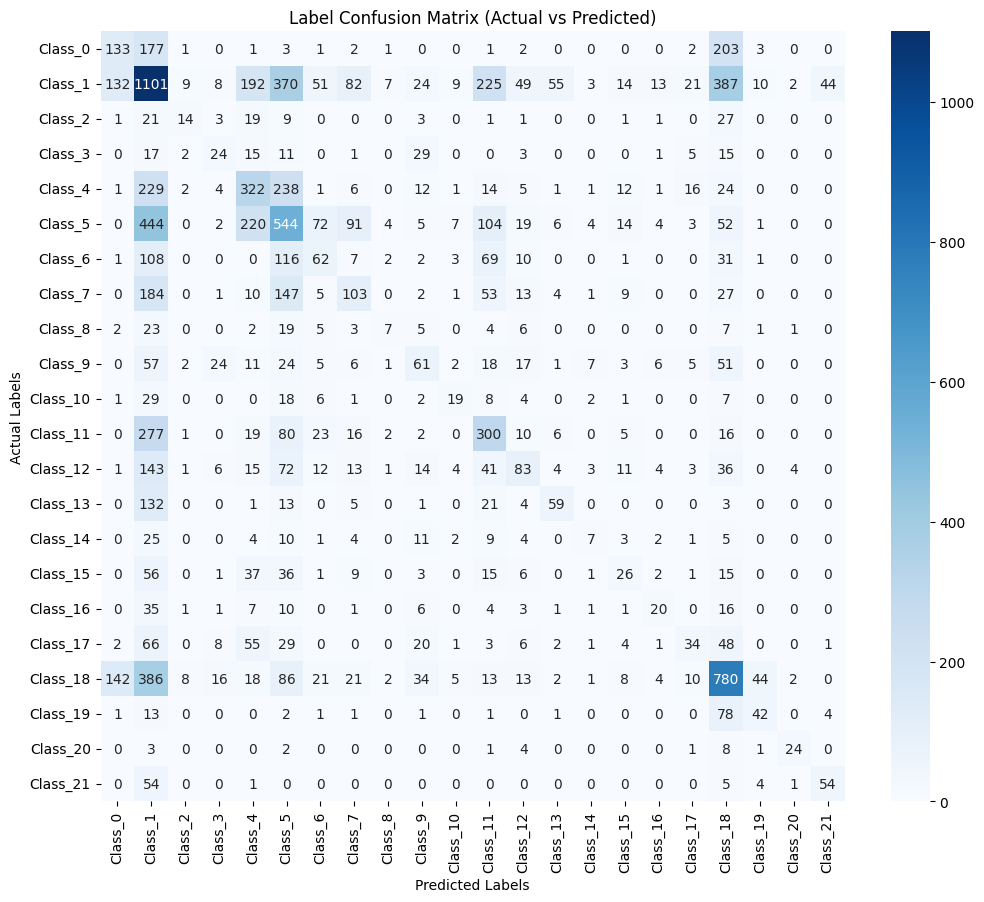

In [3]:
X_train_embeddings = np.load('/content/X_train_embeddings.npy')
y_train = np.load('/content/y_train.npy')

model = run_knn_classification(X_train_embeddings, y_train)


#GMM Classifier

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

def optimize_gmm_hyperparameters(X_train_embeddings, y_train):
    """
    Perform grid search to find optimal GMM parameters for each class

    Args:
        X_train_embeddings: BERT embeddings for training data
        y_train: Training labels (n_samples, n_classes)
    """
    param_grid = {
        'n_components': [22],
        'covariance_type': ['full']
    }

    best_models = []
    for i in range(y_train.shape[1]):
        X_pos = X_train_embeddings[y_train[:, i] == 1]
        if len(X_pos) < 2:
            print(f"Skipping Class {i} due to insufficient positive samples")
            best_models.append(None)
            continue

        print(f"Performing grid search for Class {i}...")
        grid_search = GridSearchCV(
            GaussianMixture(random_state=42),
            param_grid,
            cv=3,
            n_jobs=-1,
            verbose=2
        )
        grid_search.fit(X_pos)

        print(f"Class {i} - Best parameters:", grid_search.best_params_)
        print(f"Class {i} - Best score:", grid_search.best_score_)
        best_models.append(grid_search.best_estimator_)

    return best_models

def compute_label_confusion_matrix(y_true, y_pred, class_names):
    """
    Compute per-class 2x2 confusion matrices for multi-label classification.

    Args:
        y_true: True labels (n_samples, n_classes), binary
        y_pred: Predicted labels (n_samples, n_classes), binary
        class_names: List of class names

    Returns:
        confusion_matrices: List of 2x2 numpy arrays (one per class)
        summary_df: DataFrame summarizing TP, FP, FN, TN across all classes
    """
    n_classes = len(class_names)
    confusion_matrices = []

    for i in range(n_classes):
        tp = np.sum((y_true[:, i] == 1) & (y_pred[:, i] == 1))
        fp = np.sum((y_true[:, i] == 0) & (y_pred[:, i] == 1))
        fn = np.sum((y_true[:, i] == 1) & (y_pred[:, i] == 0))
        tn = np.sum((y_true[:, i] == 0) & (y_pred[:, i] == 0))

        cm = np.array([[tn, fp], [fn, tp]])
        confusion_matrices.append(cm)

    summary_data = {
        'Class': class_names,
        'True Positives': [cm[1, 1] for cm in confusion_matrices],
        'False Positives': [cm[0, 1] for cm in confusion_matrices],
        'False Negatives': [cm[1, 0] for cm in confusion_matrices],
        'True Negatives': [cm[0, 0] for cm in confusion_matrices]
    }
    summary_df = pd.DataFrame(summary_data)

    return confusion_matrices, summary_df

def plot_label_confusion_matrix(confusion_matrices, summary_df, class_names):
    """
    Plot per-class confusion matrices and display a summary table.

    Args:
        confusion_matrices: List of 2x2 numpy arrays
        summary_df: DataFrame with TP, FP, FN, TN per class
        class_names: List of class names
    """
    n_classes = len(class_names)
    fig, axes = plt.subplots(nrows=(n_classes + 1) // 2, ncols=2, figsize=(12, 6 * ((n_classes + 1) // 2)))
    axes = axes.flatten() if n_classes > 1 else [axes]

    for i, (cm, name) in enumerate(zip(confusion_matrices, class_names)):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                    xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
        axes[i].set_title(f'Confusion Matrix for {name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    print("\nSummary of Confusion Metrics Across All Classes:")
    print(summary_df)

def train_gmm_classifier(X_train_embeddings, X_test_embeddings, y_train, y_test, best_models, class_names=None):
    """
    Train and evaluate GMM-based classifier for multi-label classification

    Args:
        X_train_embeddings: BERT embeddings for training data
        X_test_embeddings: BERT embeddings for test data
        y_train: Training labels (n_samples, n_classes)
        y_test: Test labels (n_samples, n_classes)
        best_models: List of pre-optimized GMM models
        class_names: Optional list of class names for the confusion matrix
    """
    n_classes = y_train.shape[1]
    gmm_models = best_models

    # Make predictions
    print("Making predictions...")
    y_pred = np.zeros_like(y_test, dtype=int)
    for i in range(n_classes):
        if gmm_models[i] is None:
            y_pred[:, i] = 0
            print(f"Class {i} using default prediction (no model)")
            continue

        scores = gmm_models[i].score_samples(X_test_embeddings)
        threshold = np.median(gmm_models[i].score_samples(X_train_embeddings[y_train[:, i] == 1]))
        y_pred[:, i] = (scores >= threshold).astype(int)

    # After training and predicting with your GMM
    y_pred = np.zeros_like(y_test, dtype=int)
    for i in range(22):
      scores = gmm_models[i].score_samples(X_test_embeddings)
      threshold = np.median(gmm_models[i].score_samples(X_train_embeddings[y_train[:, i] == 1]))
      y_pred[:, i] = (scores >= threshold).astype(int)

    # Evaluate and plot
    evaluate_and_plot_multi_label_results(y_test, y_pred)


    return gmm_models

def run_gmm_classification(X_embeddings, y, class_names=None):
    """
    Run complete GMM classification pipeline with hyperparameter optimization

    Args:
        X_embeddings: Full set of embeddings (n_samples, embedding_dim)
        y: Full set of labels (n_samples, n_classes)
        class_names: Optional list of class names for the confusion matrix

    Returns:
        final_models: List of trained GMM models (one per class)
    """
    # Split data
    X_train_embeddings, X_test_embeddings, y_train, y_test = train_test_split(
        X_embeddings, y, test_size=0.2, random_state=42
    )

    # Optimize hyperparameters
    best_models = optimize_gmm_hyperparameters(X_train_embeddings, y_train)

    # Train and evaluate
    final_models = train_gmm_classifier(
        X_train_embeddings, X_test_embeddings, y_train, y_test, best_models, class_names
    )

    return final_models



Performing grid search for Class 0...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Class 0 - Best parameters: {'covariance_type': 'full', 'n_components': 22}
Class 0 - Best score: -1525719.9866063772
Performing grid search for Class 1...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Class 1 - Best parameters: {'covariance_type': 'full', 'n_components': 22}
Class 1 - Best score: -334839.7685996388
Performing grid search for Class 2...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Class 2 - Best parameters: {'covariance_type': 'full', 'n_components': 22}
Class 2 - Best score: -2017202.3223350768
Performing grid search for Class 3...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Class 3 - Best parameters: {'covariance_type': 'full', 'n_components': 22}
Class 3 - Best score: -1872652.6274690898
Performing grid search for Class 4...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Class 4 - Best parameters: {'covariance_type': '

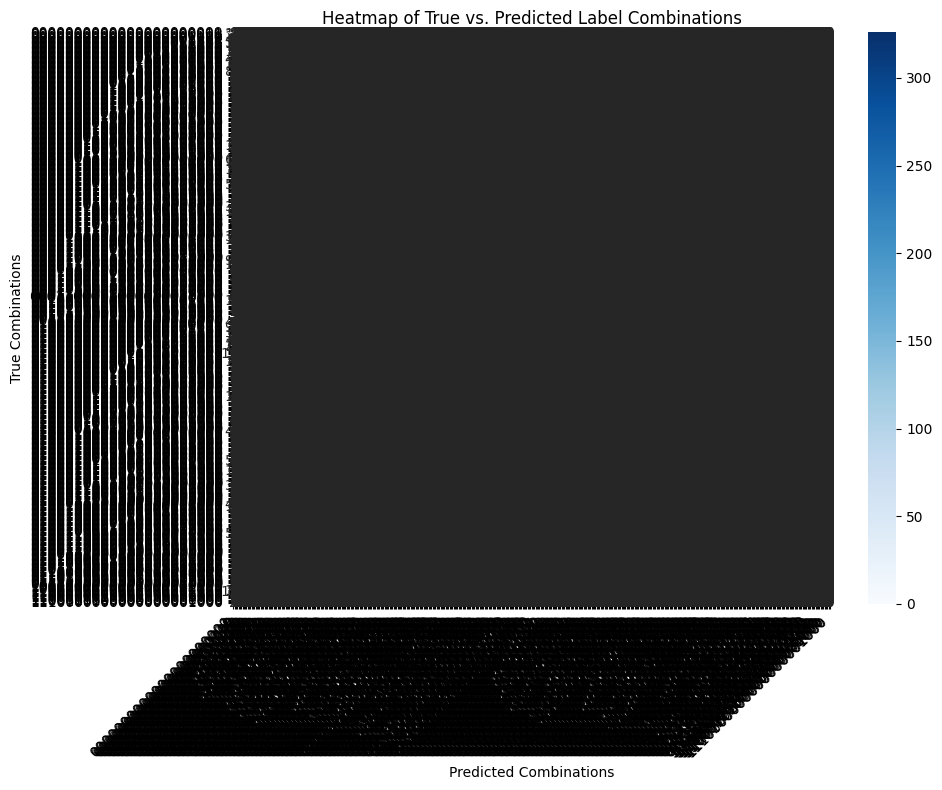

In [13]:
X_train_embeddings = np.load('/content/X_train_embeddings.npy')
y_train = np.load('/content/y_train.npy')

model = run_gmm_classification(X_train_embeddings, y_train)

##Heatmap-exp

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import pandas as pd

def evaluate_and_plot_multi_label_results(y_true, y_pred):
    """
    Evaluate and plot multi-label classification results focusing on label combinations.

    Args:
        y_true: True labels (n_samples, n_classes), binary
        y_pred: Predicted labels (n_samples, n_classes), binary
    """
    # Compute Exact Match Ratio
    exact_match_ratio = accuracy_score(y_true, y_pred)
    print(f"Exact Match Ratio: {exact_match_ratio:.4f}")

    # Convert label vectors to strings for unique combinations
    true_combinations = [''.join(map(str, row)) for row in y_true]
    pred_combinations = [''.join(map(str, row)) for row in y_pred]

    # Get unique combinations
    unique_combs = sorted(set(true_combinations).union(pred_combinations))

    # Create a confusion matrix for combinations
    comb_matrix = np.zeros((len(unique_combs), len(unique_combs)))
    for true_comb, pred_comb in zip(true_combinations, pred_combinations):
        true_idx = unique_combs.index(true_comb)
        pred_idx = unique_combs.index(pred_comb)
        comb_matrix[true_idx, pred_idx] += 1

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        comb_matrix,
        annot=True,
        fmt=".0f",
        cmap="Blues",
        xticklabels=unique_combs,
        yticklabels=unique_combs,
    )
    plt.title("Heatmap of True vs. Predicted Label Combinations")
    plt.xlabel("Predicted Combinations")
    plt.ylabel("True Combinations")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [6]:
X_train_embeddings = np.load('/content/X_train_embeddings.npy')
y_train = np.load('/content/y_train.npy')
y_test = np.load('/content/y_test.npy')

## **Define LGBM**

# **Chargement** des données d'entrainement et de test du modèle après **embeddings**.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score
)
import pandas as pd
import numpy as np
import joblib
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer


In [ ]:

X_test_embeddings = np.load('/content/X_test_embeddings_ML.npy')
X_train_embeddings = np.load('/content/X_train_embeddings_ML.npy')

# Essayer CSV
try:
    y_train = pd.read_csv('dataframe classes training.unknown')
    y_test = pd.read_csv('dataframe classes test.unknown')
    print("Fichiers chargés en tant que CSV.")
except Exception:
    print("Échec du chargement en CSV, test d'autres formats...")



In [ ]:
X_train_embeddings = np.load('/content/X_train_embeddings_ML.npy')
print(X_train_embeddings.shape)
X_test_embeddings = np.load('/content/X_test_embeddings_ML.npy')
print(X_test_embeddings.shape)




# **Evaluation du modèle**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)
import pandas as pd
import numpy as np

def predict_and_evaluate_multilabel_lgbm(models, X_test, y_test, threshold=0.5):
    """
    Prédit et évalue les performances des modèles LightGBM multi-label.

    Args:
        models (dict): Dictionnaire des modèles LightGBM par classe.
        X_test (np.array): Données de test.
        y_test (pd.DataFrame): Étiquettes réelles.
        threshold (float): Seuil de décision pour les probabilités.

    Returns:
        pd.DataFrame: Prédictions binaires pour chaque classe.
    """
    y_pred_df = pd.DataFrame()  # Stocke les prédictions
    all_metrics = {"precision": [], "recall": [], "f1_score": []}

    for class_name, model in models.items():
        print(f"Évaluation du modèle pour la classe: {class_name}")

        # Prédictions probabilistes
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilité de la classe positive
        y_pred = (y_prob >= threshold).astype(int)  # Application du seuil

        y_true = y_test[class_name]  # Étiquettes réelles pour la classe
        y_pred_df[class_name] = y_pred  # Sauvegarder les prédictions

        # Matrice de confusion
        cm = confusion_matrix(y_true, y_pred)

        # Affichage de la heatmap
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')
        plt.title(f"Matrice de confusion - {class_name}")
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies étiquettes')
        plt.xticks(ticks=[0.5, 1.5], labels=['Négatif', 'Positif'])
        plt.yticks(ticks=[0.5, 1.5], labels=['Négatif', 'Positif'], rotation=0)
        plt.show()

        # Calcul des métriques
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        all_metrics["precision"].append(precision)
        all_metrics["recall"].append(recall)
        all_metrics["f1_score"].append(f1)

        # Rapport de classification
        print(f"Rapport de classification - {class_name}")
        print(classification_report(y_true, y_pred, zero_division=0))

    # Calcul des métriques globales (macro-moyenne)
    global_precision = np.mean(all_metrics["precision"])
    global_recall = np.mean(all_metrics["recall"])
    global_f1 = np.mean(all_metrics["f1_score"])

    print("\nMétriques globales (macro-moyenne) :")
    print(f"Précision moyenne : {global_precision:.4f}")
    print(f"Rappel moyen : {global_recall:.4f}")
    print(f"F1-score moyen : {global_f1:.4f}")

    return y_pred_df


# **Entrainement du modèle.**

In [ ]:
import joblib
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer

def train_multilabel_lightgbm(X_train, y_train, validation_split=0.2, n_iter_search=20):
    """
    Entraîne un modèle LightGBM pour chaque classe avec optimisation des hyperparamètres.

    Args:
        X_train (np.array): Données d'entraînement.
        y_train (pd.DataFrame): Étiquettes binaires pour chaque classe.
        validation_split (float): Proportion des données pour la validation.
        n_iter_search (int): Nombre d'itérations pour RandomizedSearchCV.

    Returns:
        dict: Dictionnaire des meilleurs modèles LightGBM pour chaque classe.
    """
    models = {}

    # Définition de la grille d'hyperparamètres pour LightGBM
    lgbm_param_grid = {
        'num_leaves': [20, 31, 40],  # Contrôle la complexité du modèle
        'max_depth': [5, 6, 7],  # Profondeur maximale des arbres
        'learning_rate': [0.01, 0.05, 0.1],  # Taux d'apprentissage
        'n_estimators': [100, 200, 300],  # Nombre total d'arbres
        'subsample': [0.8, 0.9, 1.0],  # Pour éviter l'overfitting
        'colsample_bytree': [0.3, 0.5, 0.7],  # Sélection de colonnes
        'reg_alpha': [0.01, 0.05, 0.1],  # Régularisation L1
        'reg_lambda': [0.05, 0.1, 0.2],  # Régularisation L2
        'min_child_samples': [10, 20, 30],  # Nombre min d'échantillons par feuille
        'scale_pos_weight': [0.5, 1, 2]  # Gestion du déséquilibre de classes
    }

    for class_name in y_train.columns:
        print(f"Optimisation des hyperparamètres pour la classe: {class_name}")

        # Split des données pour l'arrêt précoce
        X_tr, X_val, y_tr, y_val = train_test_split(
            X_train, y_train[class_name],
            test_size=validation_split,
            stratify=y_train[class_name],
            random_state=42
        )

        # Définition de la métrique F1
        f1_scorer = make_scorer(f1_score, average='binary')

        # Modèle de base
        base_model = lgb.LGBMClassifier(
            objective='binary',  # Classification binaire
            metric='binary_logloss',
            random_state=42
        )

        # RandomizedSearchCV pour l'optimisation
        random_search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=lgbm_param_grid,
            n_iter=n_iter_search,
            scoring=f1_scorer,
            cv=3,
            verbose=1,
            random_state=42,
            n_jobs=-1
        )

        try:
            # Entraînement avec RandomizedSearchCV (sans arrêt précoce)
            random_search.fit(X_tr, y_tr)
            best_model = random_search.best_estimator_
            print(f"Meilleurs paramètres pour {class_name}: {random_search.best_params_}")

            # Sauvegarde du modèle
            models[class_name] = best_model
            joblib.dump(best_model, f"lgbm_model_{class_name}.joblib")
        except Exception as e:
            print(f"Erreur lors de l'entraînement du modèle pour {class_name}: {e}")

    print("Tous les modèles ont été optimisés, entraînés et sauvegardés.")
    return models


In [ ]:
model = train_multilabel_lightgbm(X_train_embeddings, y_train)


# **Deuxième entrainement**

---
On ajoute une cross validation de type stratified car certaines calsses sont rares.
---



In [ ]:
import joblib
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer

def train_multilabel_lightgbm2(X_train, y_train, n_iter_search=20, n_splits=5):
    """
    Entraîne un modèle LightGBM pour chaque classe avec cross-validation et optimisation des hyperparamètres.

    Args:
        X_train (np.array): Données d'entraînement.
        y_train (pd.DataFrame): Étiquettes binaires pour chaque classe.
        n_iter_search (int): Nombre d'itérations pour RandomizedSearchCV.
        n_splits (int): Nombre de folds pour la cross-validation.

    Returns:
        dict: Dictionnaire des meilleurs modèles LightGBM pour chaque classe.
    """
    models = {}

    # Définition de la grille d'hyperparamètres pour LightGBM
    lgbm_param_grid = {
        'num_leaves': [20, 31, 40],
        'max_depth': [5, 6, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.3, 0.5, 0.7],
        'reg_alpha': [0.01, 0.05, 0.1],
        'reg_lambda': [0.05, 0.1, 0.2],
        'min_child_samples': [10, 20, 30],
        'scale_pos_weight': [0.5, 1, 2]
    }

    # Définition de la cross-validation stratifiée
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for class_name in y_train.columns:
        print(f"Optimisation des hyperparamètres pour la classe: {class_name}")

        # Définition de la métrique F1
        f1_scorer = make_scorer(f1_score, average='binary')

        # Modèle de base
        base_model = lgb.LGBMClassifier(
            objective='binary',
            metric='binary_logloss',
            random_state=42
        )

        # RandomizedSearchCV avec StratifiedKFold
        random_search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=lgbm_param_grid,
            n_iter=n_iter_search,
            scoring=f1_scorer,
            cv=skf,  # Utilisation de la cross-validation stratifiée
            verbose=1,
            random_state=42,
            n_jobs=-1
        )

        try:
            # Entraînement avec la cross-validation
            random_search.fit(X_train, y_train[class_name])
            best_model = random_search.best_estimator_
            print(f"Meilleurs paramètres pour {class_name}: {random_search.best_params_}")

            # Sauvegarde du modèle
            models[class_name] = best_model
            joblib.dump(best_model, f"lgbm_model_{class_name}.joblib")
        except Exception as e:
            print(f"Erreur lors de l'entraînement du modèle pour {class_name}: {e}")

    print("Tous les modèles ont été optimisés, entraînés et sauvegardés.")
    return models


In [ ]:
model = train_multilabel_lightgbm2(X_train_embeddings, y_train)


# **Troisième entrainement**

In [ ]:
pip install iterative-stratification

In [ ]:
import joblib
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from tqdm import tqdm
import time

def train_multilabel_lgbm5(X_train, y_train, n_folds=5, n_iter_search=12):
    """
    Entraîne un modèle LGBM pour un problème multi-label avec recherche d'hyperparamètres optimaux.

    Args:
        X_train (np.array): Données d'entraînement (représentations de texte).
        y_train (pd.DataFrame): Labels binaires associés (1 pour présence, 0 pour absence).
        n_folds (int): Nombre de plis pour la validation croisée.
        n_iter_search (int): Nombre d'itérations pour la recherche RandomizedSearchCV.

    Returns:
        best_model (MultiOutputClassifier): Modèle optimisé et entraîné.
    """
    start_time = time.time()  # Démarrer le compteur de temps

    print("Entraînement du modèle LGBM multi-label avec sorties probabilistes...")

    # Fonction de score F1 pour la classification multi-label
    def multi_label_f1(y_true, y_pred):
        return f1_score(y_true, (y_pred > 0.5).astype(int), average='macro')

    f1_scorer = make_scorer(multi_label_f1, greater_is_better=True)

    # Création du modèle LGBM
    lgbm_model = LGBMClassifier(
        objective="binary",  # Classification binaire pour chaque label
        metric="binary_logloss",  # Log loss pour la classification binaire
        random_state=42
    )

    # Application de MultiOutputClassifier pour gérer les labels multiples
    multi_output_model = MultiOutputClassifier(lgbm_model)

    # Configuration de la validation croisée stratifiée pour le multi-label
    kf = MultilabelStratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Paramètres pour la recherche aléatoire d'hyperparamètres
    lgbm_param_grid = {
        'estimator__num_leaves': [31, 50, 100],
        'estimator__max_depth': [-1, 5, 10],
        'estimator__learning_rate': [0.01, 0.05, 0.1],
        'estimator__n_estimators': [100, 200, 300]
    }

    # Recherche aléatoire des meilleurs hyperparamètres
    random_search = RandomizedSearchCV(
        estimator=multi_output_model,
        param_distributions=lgbm_param_grid,
        n_iter=n_iter_search,
        cv=kf,
        scoring=f1_scorer,
        n_jobs=-1,
        verbose=2,
        random_state=42,
        error_score='raise'
    )

    # Utilisation de tqdm pour suivre les itérations de RandomizedSearchCV
    print("Début de la recherche d'hyperparamètres...")
    for i in tqdm(range(n_iter_search), desc="Recherche des hyperparamètres", unit="itération"):
        # On effectue l'itération de RandomizedSearchCV dans tqdm pour afficher la progression
        random_search.fit(X_train, y_train)

    # Récupérer le meilleur modèle trouvé
    best_model = random_search.best_estimator_
    print("Meilleurs hyperparamètres trouvés:", random_search.best_params_)

    # Sauvegarde du modèle entraîné
    joblib.dump(best_model, "lgbm_model_multilabel_prob.joblib")
    print("Modèle sauvegardé sous 'lgbm_model_multilabel_prob.joblib'")

    # Calcul du temps écoulé
    elapsed_time = time.time() - start_time
    print(f"Temps total d'entraînement: {elapsed_time:.2f} secondes")

    return best_model


In [ ]:
import joblib
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import f1_score, make_scorer
import time

def train_multilabel_lgbm_fixed(X_train, y_train, n_folds=5):
    """
    Entraîne un modèle LGBM pour un problème multi-label avec des hyperparamètres prédéfinis.

    Args:
        X_train (np.array): Données d'entraînement (représentations de texte).
        y_train (pd.DataFrame): Labels binaires associés (1 pour présence, 0 pour absence).
        n_folds (int): Nombre de plis pour la validation croisée.

    Returns:
        best_model (MultiOutputClassifier): Modèle entraîné.
    """
    start_time = time.time()  # Démarrer le compteur de temps

    print("Entraînement du modèle LGBM multi-label avec sorties probabilistes...")

    # Fonction de score F1 pour la classification multi-label
    def multi_label_f1(y_true, y_pred):
        return f1_score(y_true, (y_pred > 0.5).astype(int), average='macro')

    f1_scorer = make_scorer(multi_label_f1, greater_is_better=True)

    # Création du modèle LGBM avec les hyperparamètres définis
    lgbm_model = LGBMClassifier(
        objective="binary",  # Classification binaire pour chaque label
        metric="binary_logloss",  # Log loss pour la classification binaire
        random_state=42,
        subsample=1.0,
        scale_pos_weight=5,
        reg_lambda=1,
        reg_alpha=0,
        n_estimators=300,
        min_child_weight=5,
        max_depth=6,
        learning_rate=0.1,
        colsample_bytree=0.9
    )

    # Application de MultiOutputClassifier pour gérer les labels multiples
    multi_output_model = MultiOutputClassifier(lgbm_model)

    # Configuration de la validation croisée stratifiée pour le multi-label
    kf = MultilabelStratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Entraînement du modèle avec validation croisée
    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        multi_output_model.fit(X_train_fold, y_train_fold)

    # Sauvegarde du modèle entraîné
    joblib.dump(multi_output_model, "lgbm_model_multilabel_fixed.joblib")
    print("Modèle sauvegardé sous 'lgbm_model_multilabel_fixed.joblib'")

    # Calcul du temps écoulé
    elapsed_time = time.time() - start_time
    print(f"Temps total d'entraînement: {elapsed_time:.2f} secondes")

    return multi_output_model


In [ ]:
model =train_multilabel_lgbm5(X_train, y_train)

Entraînement du modèle LGBM multi-label avec sorties probabilistes...
Début de la recherche d'hyperparamètres...


Recherche des hyperparamètres:   0%|          | 0/12 [00:00<?, ?itération/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 49, number of negative: 2027
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.023603 -> initscore=-3.722492
[LightGBM] [Info] Start training from score -3.722492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 426, number of negative: 1650
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205202 -> initscore=-1.354091
[LightGBM] [Info] Start training from score -1.354091


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 120, number of negative: 1956
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057803 -> initscore=-2.791165
[LightGBM] [Info] Start training from score -2.791165


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 184, number of negative: 1892
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088632 -> initscore=-2.330454
[LightGBM] [Info] Start training from score -2.330454


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 257, number of negative: 1819
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.123796 -> initscore=-1.956966
[LightGBM] [Info] Start training from score -1.956966


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 307, number of negative: 1769
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147881 -> initscore=-1.751322
[LightGBM] [Info] Start training from score -1.751322


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 166, number of negative: 1910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.079961 -> initscore=-2.442871
[LightGBM] [Info] Start training from score -2.442871


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 136, number of negative: 1940
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.065511 -> initscore=-2.657788
[LightGBM] [Info] Start training from score -2.657788


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 101, number of negative: 1975
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048651 -> initscore=-2.973203
[LightGBM] [Info] Start training from score -2.973203


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 308, number of negative: 1768
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148362 -> initscore=-1.747504
[LightGBM] [Info] Start training from score -1.747504


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 93, number of negative: 1983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.044798 -> initscore=-3.059767
[LightGBM] [Info] Start training from score -3.059767


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 262, number of negative: 1814
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126204 -> initscore=-1.934945
[LightGBM] [Info] Start training from score -1.934945


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 301, number of negative: 1775
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144990 -> initscore=-1.774445
[LightGBM] [Info] Start training from score -1.774445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 79, number of negative: 1997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038054 -> initscore=-3.229953
[LightGBM] [Info] Start training from score -3.229953


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 94, number of negative: 1982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045279 -> initscore=-3.048567
[LightGBM] [Info] Start training from score -3.048567


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 157, number of negative: 1919
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.075626 -> initscore=-2.503314
[LightGBM] [Info] Start training from score -2.503314


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 88, number of negative: 1988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.042389 -> initscore=-3.117548
[LightGBM] [Info] Start training from score -3.117548


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1825
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120906 -> initscore=-1.983882
[LightGBM] [Info] Start training from score -1.983882


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 404, number of negative: 1672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.194605 -> initscore=-1.420361
[LightGBM] [Info] Start training from score -1.420361


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 162, number of negative: 1914
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.078035 -> initscore=-2.469354
[LightGBM] [Info] Start training from score -2.469354


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 200, number of negative: 1876
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096339 -> initscore=-2.238580
[LightGBM] [Info] Start training from score -2.238580


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 1935
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2076, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067919 -> initscore=-2.619103
[LightGBM] [Info] Start training from score -2.619103


Recherche des hyperparamètres:   8%|▊         | 1/12 [6:27:01<70:57:12, 23221.16s/itération]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score
import time

def train_best_lgbm_multioutput(X_train, y_train, threshold=0.3):
    """
    Entraîne un modèle LightGBM multi-output avec les meilleurs hyperparamètres trouvés.

    Args:
        X_train (np.array): Matrice des features d'entraînement.
        y_train (np.array): Matrice binaire des labels d'entraînement.
        threshold (float, optional): Seuil de classification pour binariser les prédictions.

    Returns:
        best_model (MultiOutputClassifier): Modèle MultiOutputClassifier entraîné.
    """
    best_params = {
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'max_depth': 6,
        'learning_rate': 0.1,
        'n_estimators': 300,
        'subsample': 1.0,
        'colsample_bytree': 0.9,
        'reg_alpha': 0,
        'reg_lambda': 1,
        'min_child_weight': 5,
        'scale_pos_weight': 5,
        'objective': 'binary',  # Maintenir 'binary' pour chaque tâche individuellement.
        'metric': 'binary_logloss',
        'random_state': 42
    }

    start_time = time.time()

    # Initialisation du classificateur LightGBM
    lgbm_model = LGBMClassifier(**best_params)

    # Utilisation de MultiOutputClassifier pour gérer plusieurs sorties
    multi_output_model = MultiOutputClassifier(lgbm_model)

    # Entraînement du modèle
    multi_output_model.fit(X_train, y_train)

    # Sauvegarde du modèle entraîné
    joblib.dump(multi_output_model, "lgbm_multioutput_model_best_trained.joblib")
    print("Modèle multi-output entraîné et sauvegardé sous 'lgbm_multioutput_model_best_trained.joblib'")

    # Évaluation sur les données d'entraînement
    y_train_pred = multi_output_model.predict(X_train)  # Obtenez les prédictions binaires directement
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    print(f"Score F1 sur les données d'entraînement : {train_f1:.4f}")

    # Importance des caractéristiques pour chaque sortie (étiquette)
    for i, model in enumerate(multi_output_model.estimators_):
        plt.figure(figsize=(10, 6))
        plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
        plt.title(f"Importance des caractéristiques pour l'étiquette {i+1}")
        plt.xlabel("Importance")
        plt.ylabel("Caractéristiques")
        plt.show()

    end_time = time.time()
    print(f"Durée totale de l'entraînement : {end_time - start_time:.2f} secondes")

    return multi_output_model


In [ ]:
model2 = train_best_lgbm(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (2076, 22) instead.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

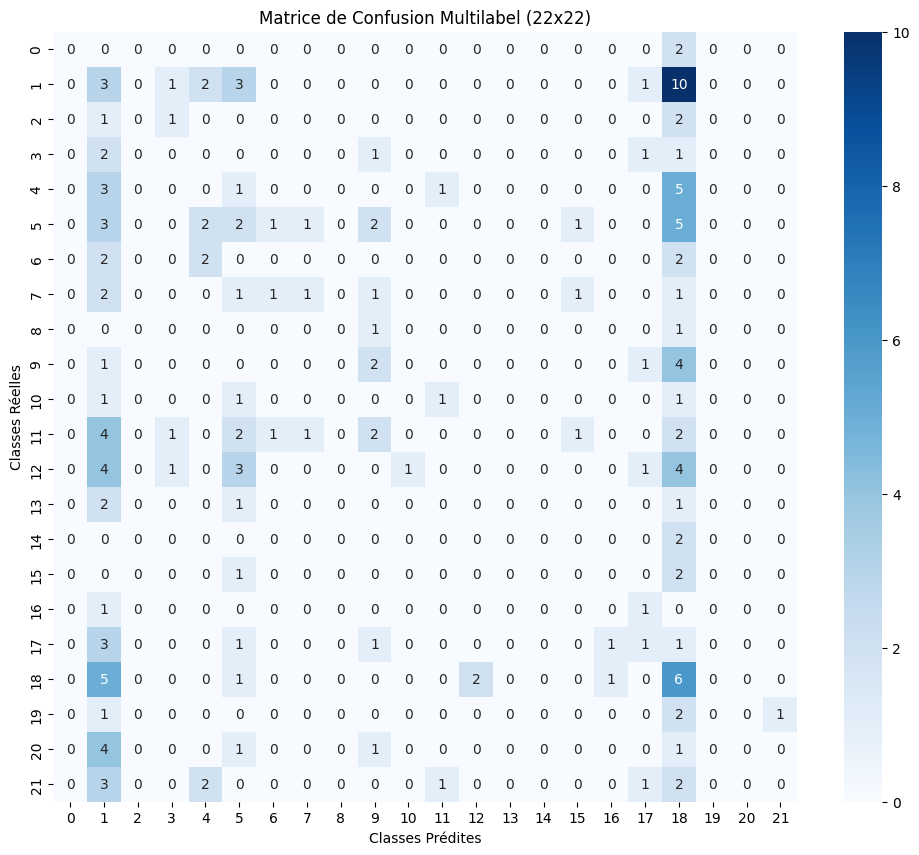

In [ ]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le modèle
model = joblib.load("lgbm_model_multilabel_fixed.joblib")

# Charger les données de test
X_test = joblib.load("X_test.pkl")
y_test = joblib.load("y_test.pkl")

# Vérifier que les labels sont bien binaires
y_test = (y_test > 0.5).astype(int)

# Faire les prédictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Binarisation des prédictions

# Nombre de classes (22 dans ton cas)
n_classes = y_test.shape[1]

# Initialiser une matrice de confusion 22x22
conf_matrix = np.zeros((n_classes, n_classes))

# Remplir la matrice : compter les erreurs entre classes
for i in range(len(y_test)):  # Pour chaque exemple
    true_labels = np.where(y_test[i] == 1)[0]  # Indices des vraies classes
    pred_labels = np.where(y_pred[i] == 1)[0]  # Indices des classes prédites

    for true_label in true_labels:
        for pred_label in pred_labels:
            conf_matrix[true_label, pred_label] += 1

# 🔥 **Affichage de la matrice de confusion avec Matplotlib + Seaborn**
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.xlabel("Classes Prédites")
plt.ylabel("Classes Réelles")
plt.title("Matrice de Confusion Multilabel (22x22)")
plt.show()


📏 Dimensions des données : X_test = (530, 768), y_test = (530, 22)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

🔍 Avant transposition : y_pred_proba.shape = (530, 44), y_test.shape = (530, 22)
🔍 Après correction : y_pred_proba.shape = (530, 22), y_test.shape = (530, 22)

📊 Moyenne des scores : F1 = 0.0806 | Précision = 0.0582 | Rappel = 0.5056


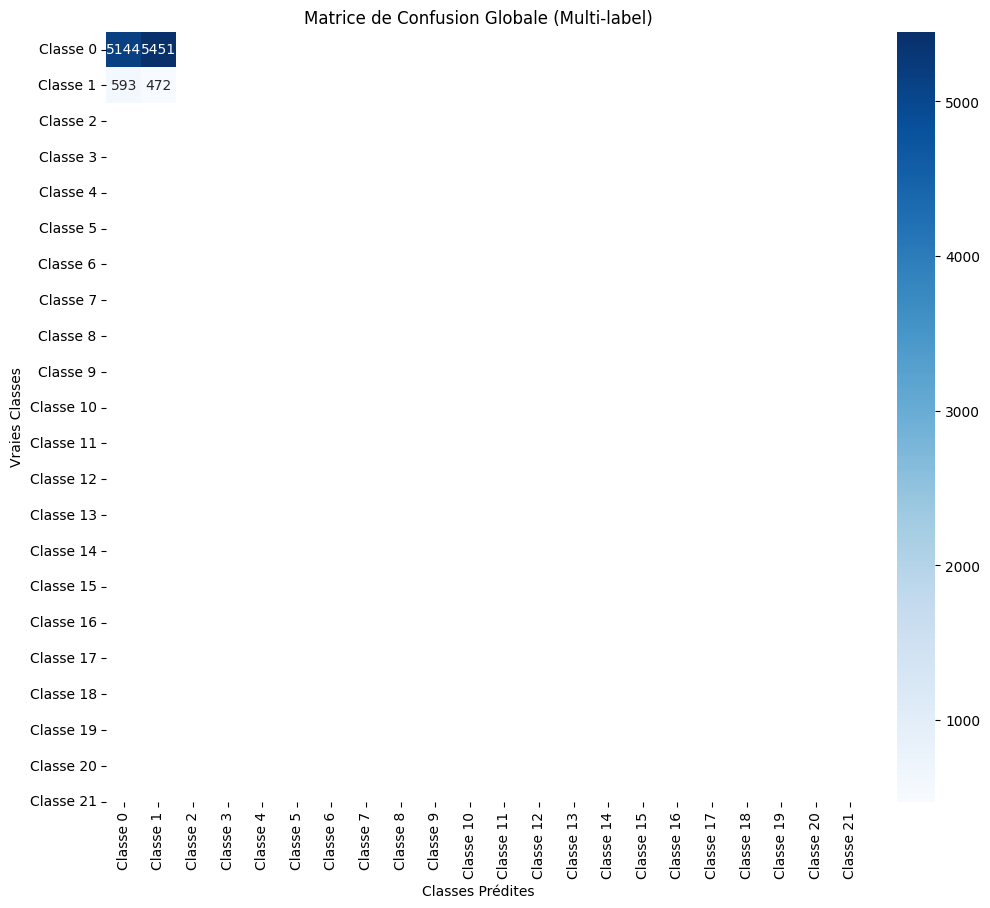

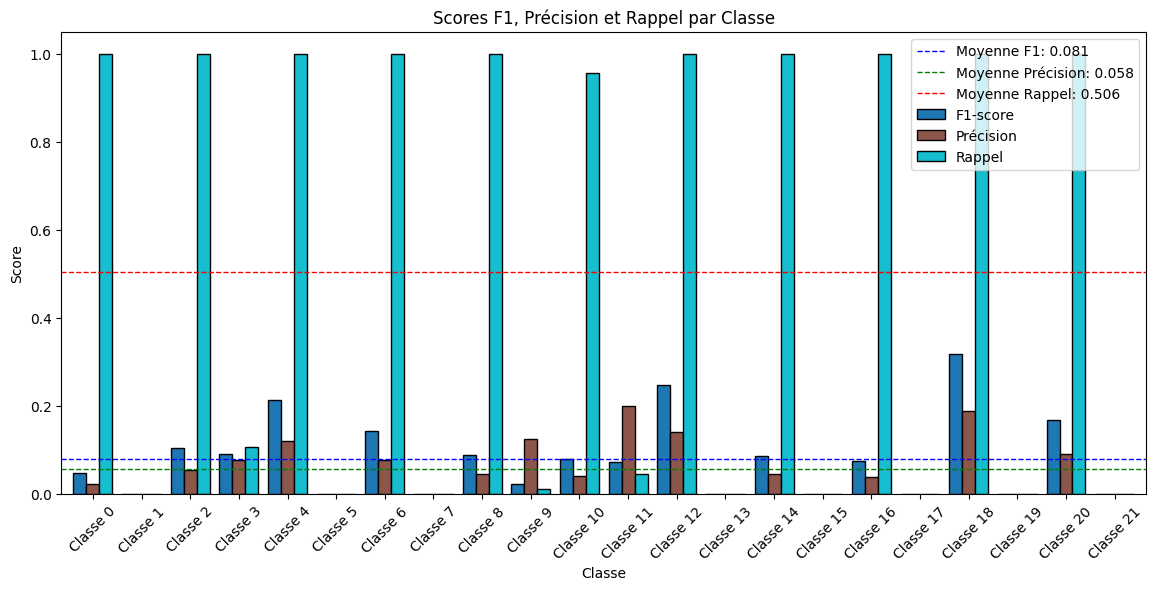

In [ ]:
e=evaluate(model, X_test, y_test, class_names=None, threshold=0.33)

Split des données

In [ ]:
X_test_embeddings = np.load('/content/X_test_embeddings_ML.npy')
X_train_embeddings = np.load('/content/X_train_embeddings_ML.npy')

y_train = pd.read_csv('dataframe classes training.unknown')
y_test = pd.read_csv('dataframe classes test.unknown')

In [ ]:
!pip install iterative-stratification


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

# Fonction pour visualiser la répartition des classes
def plot_class_distribution(y, title):
    class_counts = y.sum(axis=0)  # Nombre d'occurrences par classe
    sns.barplot(x=np.arange(len(class_counts)), y=class_counts)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Nombre d\'échantillons')
    plt.show()

def undersample_and_stratify(X_train_embeddings, X_test_embeddings, y_train, y_test,n_classe, undersample_percentage=0.375, n_splits=5, random_state=42):
    """
    Fonction pour effectuer un undersampling et une stratification multilabel.

    :param X_train_embeddings: Embeddings d'entraînement (numpy array)
    :param X_test_embeddings: Embeddings de test (numpy array)
    :param y_train: Labels d'entraînement (numpy array)
    :param y_test: Labels de test (numpy array)
    :param undersample_percentage: Pourcentage d'échantillons de la classe 1 à conserver (par défaut 37.5%)
    :param n_splits: Nombre de splits pour la stratification (par défaut 5)
    :param random_state: Seed pour la reproductibilité (par défaut 42)

    :return: (X_train, X_test, y_train, y_test) après undersampling et stratification
    """
    # Fusionner les données train et test
    X = np.vstack([X_train_embeddings, X_test_embeddings])  # Tes embeddings
    Y = np.vstack([y_train, y_test])  # Tes labels multilabel

    # Visualiser la répartition des classes AVANT l'undersampling
    plot_class_distribution(Y, "Répartition des classes avant undersampling")

    # Identifier les indices des échantillons où la classe 1 est présente
    class_1_indices = np.where(Y[:, n_classe] == 1)[0]  # Classe 1 correspond à y[:, 1]

    # Identifier les indices des échantillons où la classe 1 n'est pas présente
    non_class_1_indices = np.where(Y[:, n_classe] == 0)[0]

    # Calculer combien d'échantillons de la classe 1 nous voulons garder
    undersample_size = int(len(class_1_indices) * undersample_percentage)  # Exemple : garder 37.5% des échantillons de la classe 1

    # Vérifier si la taille du sous-échantillon demandé est plus grande que la taille de la classe 1
    undersample_size = min(undersample_size, len(non_class_1_indices))  # Ajuster si nécessaire

    # Sélectionner un sous-échantillon des indices où la classe 1 est présente
    undersampled_class_1_indices = np.random.choice(class_1_indices, size=undersample_size, replace=False)

    # Récupérer les indices finaux : échantillons de classe 1 sous-échantillonnés et les échantillons sans classe 1
    final_indices = np.concatenate([undersampled_class_1_indices, non_class_1_indices])

    # Sélectionner les échantillons finaux dans X et Y
    X_undersampled = X[final_indices]
    Y_undersampled = Y[final_indices]

    # Visualiser la répartition des classes après undersampling
    plot_class_distribution(Y_undersampled, "Répartition des classes après undersampling")

    # Appliquer la stratification multilabel
    mskf = MultilabelStratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Appliquer la stratification et obtenir les ensembles d'entraînement et de test
    for train_index, test_index in mskf.split(X_undersampled, Y_undersampled):
        X_train, X_test = X_undersampled[train_index], X_undersampled[test_index]
        y_train, y_test = Y_undersampled[train_index], Y_undersampled[test_index]

        break  # On prend juste la première itération pour voir les résultats

    # Visualiser la répartition des classes dans y_train et y_test après stratification
    plot_class_distribution(y_train, "Répartition des classes dans y_train après stratification")
    plot_class_distribution(y_test, "Répartition des classes dans y_test après stratification")

    return X_train, X_test, y_train, y_test


In [ ]:

# Utilisation de la méthode
X_train, X_test, y_train, y_test = undersample_and_stratify(
    X_train_embeddings, X_test_embeddings, y_train, y_test, 1, undersample_percentage=0.375, n_splits=5, random_state=42
)


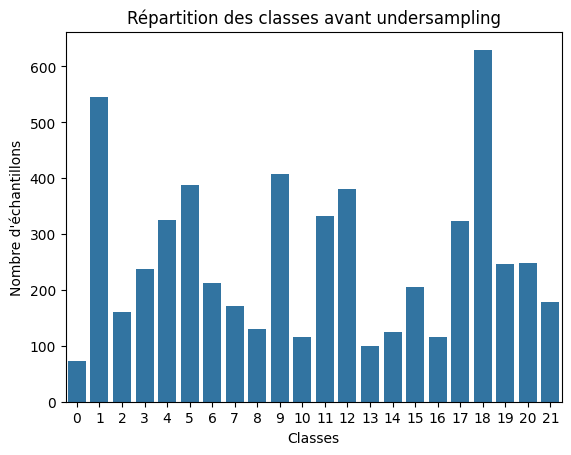

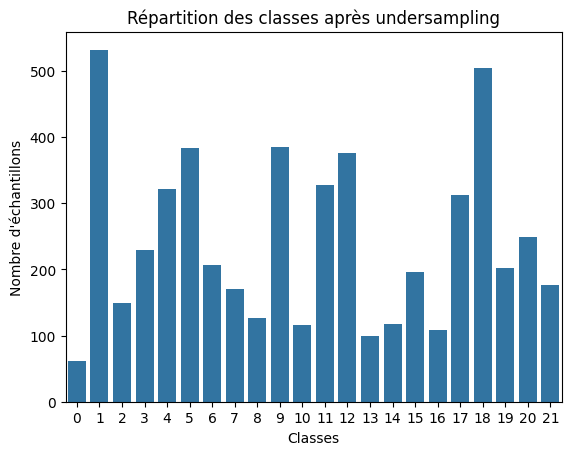

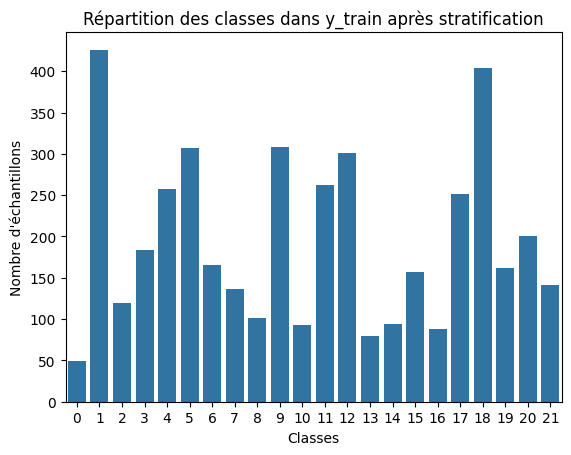

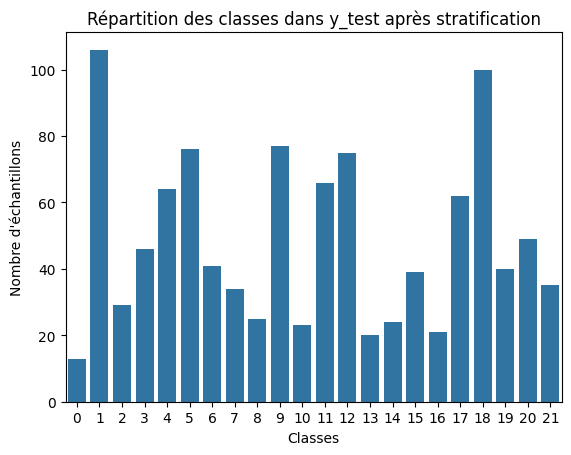

In [ ]:
X_train, X_test, y_train, y_test = undersample_and_stratify(
    X_train_embeddings, X_test_embeddings, y_train, y_test, 18, undersample_percentage=0.80, n_splits=5, random_state=42
)


In [ ]:
# Sauvegarder les variables dans des fichiers

import joblib

# Sauvegarde de l'ensemble d'entraînement
#joblib.dump(X_train, 'X_train.pkl')

# Sauvegarde de l'ensemble de test
#joblib.dump(X_test, 'X_test.pkl')

# Sauvegarde des labels d'entraînement
#joblib.dump(y_train, 'y_train.pkl')

# Sauvegarde des labels de test
#joblib.dump(y_test, 'y_test.pkl')


In [ ]:
import joblib

# Charger les variables à partir des fichiers
X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl')
y_test = joblib.load('y_test.pkl')


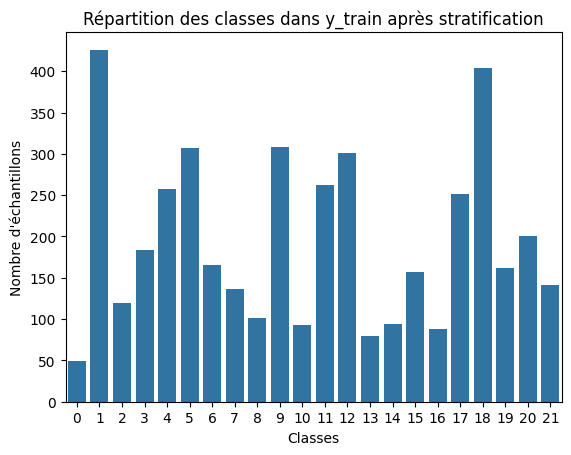

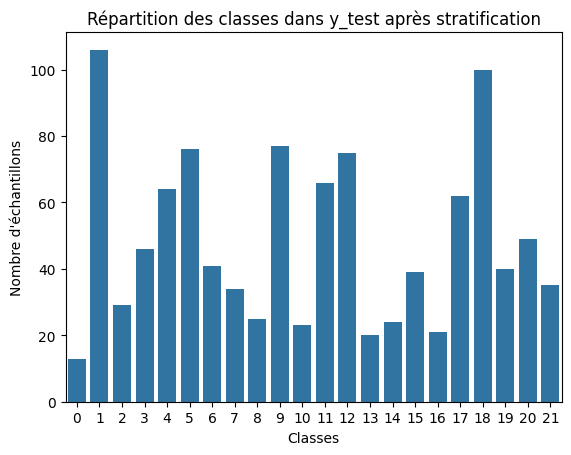

In [ ]:
 # Visualiser la répartition des classes dans y_train et y_test après stratification
plot_class_distribution(y_train, "Répartition des classes dans y_train après stratification")
plot_class_distribution(y_test, "Répartition des classes dans y_test après stratification")

# **Chargement du model.**

# **Evalution et matrices de confusion**

**Affichage de toute les matrices de confusion**

In [ ]:
predict_and_evaluate_multilabel_lgbm(models, X_test_embeddings, y_test)

**Synthétisation**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_multiple_confusion_matrices(models, X_test, y_test, threshold=0.5, cols=3):
    """
    Prédit et évalue les performances des modèles LightGBM multi-label et affiche toutes les matrices de confusion.

    Args:
        models (dict): Dictionnaire des modèles LightGBM par classe.
        X_test (np.array): Données de test.
        y_test (pd.DataFrame): Étiquettes réelles.
        threshold (float): Seuil de décision pour les probabilités.
        cols (int): Nombre de colonnes pour l'affichage des matrices.

    Returns:
        None
    """
    rows = int(np.ceil(len(models) / cols))

    plt.figure(figsize=(15, rows * 5))

    for i, (class_name, model) in enumerate(models.items()):
        # Prédictions probabilistes
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilité de la classe positive
        y_pred = (y_prob >= threshold).astype(int)  # Application du seuil

        y_true = y_test[class_name]  # Étiquettes réelles pour la classe

        # Matrice de confusion
        cm = confusion_matrix(y_true, y_pred)

        # Subplot pour chaque classe
        plt.subplot(rows, cols, i + 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')
        plt.title(f"Matrice de confusion - {class_name}")
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies étiquettes')
        plt.xticks(ticks=[0.5, 1.5], labels=['Négatif', 'Positif'])
        plt.yticks(ticks=[0.5, 1.5], labels=['Négatif', 'Positif'], rotation=0)

    plt.tight_layout()
    plt.show()

plot_multiple_confusion_matrices(models, X_test_embeddings, y_test)  # Remplace par tes données et ton modèle



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, multilabel_confusion_matrix, f1_score
import joblib
from tqdm.auto import tqdm

def load_data():
    """Load training and testing embeddings and labels."""
    try:
        X_train = np.load('/content/X_train_embeddings_ML.npy')
        X_test = np.load('/content/X_test_embeddings_ML.npy')
        y_train = pd.read_csv('/content/dataframe classes training.unknown').iloc[:, :].values
        y_test = pd.read_csv('/content/dataframe classes test.unknown').iloc[:, :].values

        print("Data loaded successfully:")
        print(f"X_train shape: {X_train.shape}")
        print(f"X_test shape: {X_test.shape}")
        print(f"y_train shape: {y_train.shape}")
        print(f"y_test shape: {y_test.shape}")
        return X_train, X_test, y_train, y_test
    except Exception as e:
        print("Error loading data:", e)
        raise


def load_models(class_names):
    """Load pre-trained models for each class from disk."""
    models = {}
    for class_name in class_names:
        try:
            model = joblib.load(f'lgbm_model_{class_name}(1).joblib')
            models[class_name] = model
            print(f"Loaded model for {class_name}")
        except Exception as e:
            print(f"Error loading model for {class_name}: {e}")
    return models


def evaluate_multilabel_model(models, X_test, y_test, class_names, threshold=0.5, plot=True):
    """
    Evaluate the multi-label model with a given threshold.
    Returns the binary predictions and prediction probabilities.
    """
    n_classes = len(class_names)
    y_proba = np.zeros((X_test.shape[0], n_classes))

    print("Generating predictions...")
    for i, class_name in enumerate(tqdm(models.keys())):
        model = models[class_name]
        y_proba[:, i] = model.predict_proba(X_test)[:, 1]

    # Apply threshold to generate binary predictions
    y_pred = (y_proba > threshold).astype(int)

    # Print classification report
    print("\n===== Classification Report =====")
    print(classification_report(y_test, y_pred, target_names=class_names))

    if plot:
        # Aggregated confusion matrix (summing confusion matrices for each class)
        conf_matrices = multilabel_confusion_matrix(y_test, y_pred)
        agg_conf_matrix = conf_matrices.sum(axis=0)
        plt.figure(figsize=(10, 8))
        sns.heatmap(agg_conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.title('Aggregated Confusion Matrix (All Classes)')
        plt.show()

        # Plot per-class F1 scores
        report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
        f1_scores = {cls: report[cls]['f1-score'] for cls in class_names}
        plt.figure(figsize=(12, 6))
        bars = plt.bar(f1_scores.keys(), f1_scores.values())
        plt.ylim(0, 1.0)
        plt.ylabel('F1 Score')
        plt.title('F1 Score by Class')
        plt.xticks(rotation=90)
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                     f'{height:.2f}', ha='center', va='bottom')
        plt.tight_layout()
        plt.show()

    return y_pred, y_proba


def optimize_thresholds(y_true, y_proba, class_names, steps=10):
    """
    Optimize decision thresholds for each class to maximize F1 score.
    Returns a dictionary with the best threshold for each class.
    """
    thresholds = np.linspace(0.1, 0.9, steps)
    best_thresholds = {}

    for i, class_name in enumerate(class_names):
        best_f1 = 0
        best_threshold = 0.5
        for threshold in thresholds:
            y_pred = (y_proba[:, i] > threshold).astype(int)
            f1 = f1_score(y_true[:, i], y_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
        best_thresholds[class_name] = best_threshold
        print(f"{class_name}: Best threshold = {best_threshold:.2f}, F1 = {best_f1:.4f}")
    return best_thresholds


def compute_label_confusion_matrix(y_true, y_pred, class_names):
    """
    Compute a label confusion matrix for multi-label classification.
    Each entry (i, j) is the count of samples where actual label i is 1
    and predicted label j is 1.
    """
    n_classes = len(class_names)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=int)
    for i in range(n_classes):
        for j in range(n_classes):
            confusion_matrix[i, j] = np.sum((y_true[:, i] == 1) & (y_pred[:, j] == 1))
    confusion_df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    return confusion_df

def plot_label_confusion_matrix(confusion_df):
    """Plot the label confusion matrix as a heatmap."""
    plt.figure(figsize=(12, 10))
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Label Confusion Matrix (Actual vs Predicted)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()


if __name__ == "__main__":
    try:
        # Load the data
        X_train, X_test, y_train, y_test = load_data()
        class_names = [f'Classe{i}' for i in range(y_train.shape[1])]

        # Load pre-trained models from disk
        models = load_models(class_names)

        # Evaluate with default threshold (0.5)
        y_pred, y_proba = evaluate_multilabel_model(models, X_test, y_test, class_names, threshold=0.5, plot=True)

        # Optimize decision thresholds based on F1 scores
        print("\nOptimizing decision thresholds...")
        best_thresholds = optimize_thresholds(y_test, y_proba, class_names)

        # Re-evaluate using optimized thresholds
        y_pred_optimized = np.zeros_like(y_test)
        for i, class_name in enumerate(class_names):
            y_pred_optimized[:, i] = (y_proba[:, i] > best_thresholds[class_name]).astype(int)

        print("\n===== Classification Report with Optimized Thresholds =====")
        print(classification_report(y_test, y_pred_optimized, target_names=class_names))

        # Compute and plot the custom label confusion matrix
        confusion_df = compute_label_confusion_matrix(y_test, y_pred_optimized, class_names)
        print("\nLabel Confusion Matrix:")
        print(confusion_df)
        plot_label_confusion_matrix(confusion_df)

        print("Model evaluation completed successfully!")

    except Exception as e:
        import traceback
        print("Error in main execution:", e)
        traceback.print_exc()
